# **Import library and Load data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
has_id_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HHTQĐ/Has_id_Github.csv', header=0)
no_id_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HHTQĐ/No_id_Kaggle.csv', header=0)

# **Thu thập dữ liệu từ nhiều nguồn và đánh lại nhãn dữ liệu**

Có hai bộ dữ liệu khá tương đồng được chúng em thu thập từ Github và Kaggle. Chúng em dự định sẽ ghép hai bộ dữ liệu này với nhau để tăng kích thước và sự toàn diện cho bộ dữ liệu. Tuy nhiên, trước tiên, chúng em cần *kiểm tra xem hai bộ dữ liệu có thực sự khác nhau hay không* và *nhãn của hai bộ dữ liệu có cùng phân phối hay không*

In [ ]:
has_id_data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.000,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.000,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.000,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.000,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.000,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.000,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.000,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.000,satisfied


In [ ]:
no_id_data

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.000
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.000
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.000
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.000
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.000
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.000
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.000
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.000


Dễ thấy, bộ dữ liệu lưu trong dataframe has_id_data (bộ dữ liệu từ Github) có 3 cột đầu là thừa so với bộ dữ liệu lưu trong dataframe no_id_data. Trước tiên, chúng em sẽ *xóa đi ba cột này*.

In [ ]:
has_id_data.drop(columns=['Gender'], inplace=True)
has_id_data.drop(columns=['Unnamed: 0'], inplace=True)
has_id_data.drop(columns=['id'], inplace=True)

Tiếp tục nhận thấy, \\
has_id_data thừa cột Inflight service \\
no_id_data thừa cột Online support \\
Do đó, chúng em sẽ tiếp tục loại bỏ hai cột này.

In [ ]:
has_id_data.drop(columns=['Inflight service'], inplace=True)
no_id_data.drop(columns=['Online support'], inplace=True)

Nhìn chung, sau khi loại bỏ những cột không trùng, mỗi hai cột có tên tương tự nhau trong hai bộ dữ liệu sẽ giống nhau về ngữ nghĩa; về kiểu dữ liệu và dải giá trị của các điểm dữ liệu trong cột;... Tuy nhiên, có một chút khác biệt trong nhãn của dataset_has_id và dataset_no_id. Một bên nhãn là dissatisfied và satisfied, một bên là neutral or dissatisfied và satisfied. Câu hỏi là nhãn của hai bộ dữ liệu có được đánh với cách thức tương tự nhau hay không? dissatisfied và neutral or dissatisfied về mặt ngữ nghĩa là giống hay khác nhau? Chúng em sẽ thực hiện theo cách thức sau để kiểm duyệt vấn đề này.

In [ ]:
#Tính điểm khảo sát trung bình để phục vụ trực quan hóa

satisfaction_criteria = [
    'Inflight wifi service', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
    'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Departure/Arrival time convenient', 'Cleanliness'
]

no_id_data['avr_satisfaction_score'] = no_id_data[satisfaction_criteria].sum(axis=1)/13
has_id_data['avr_satisfaction_score'] = has_id_data[satisfaction_criteria].sum(axis=1)/13

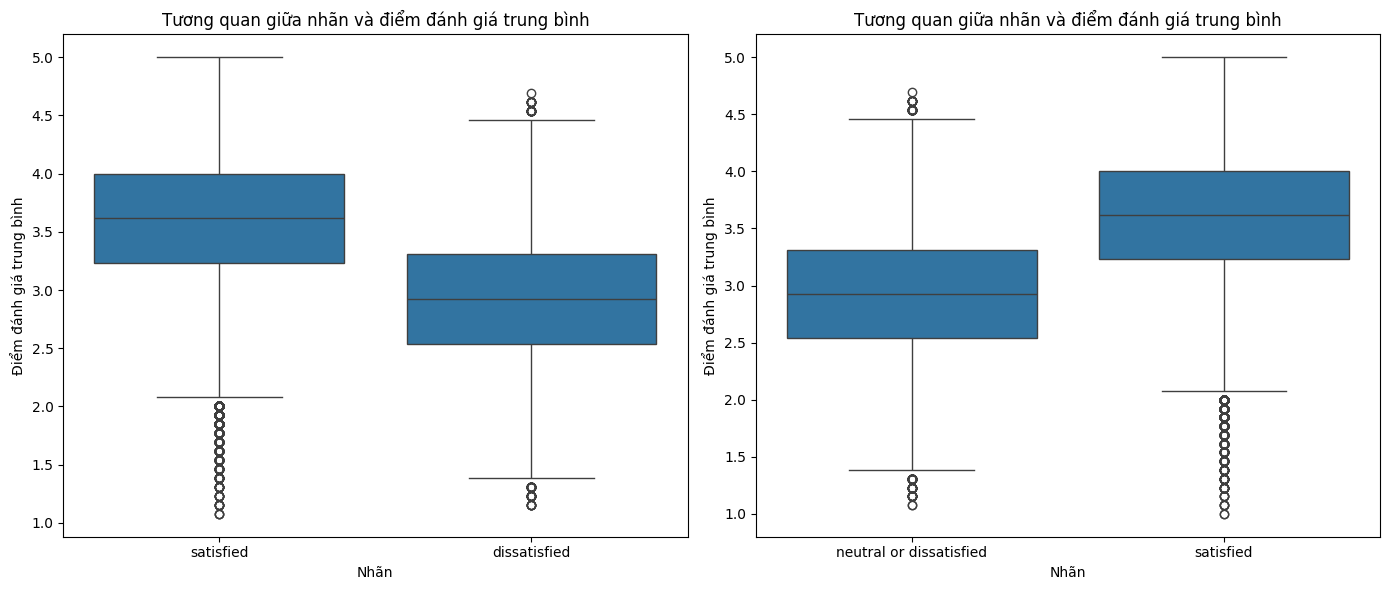

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Vẽ biểu đồ boxplot
sns.boxplot(ax=axes[0], x='satisfaction', y='avr_satisfaction_score', data=no_id_data)
# Thêm tiêu đề và nhãn cho các trục
axes[0].set_title('Tương quan giữa nhãn và điểm đánh giá trung bình')
axes[0].set_xlabel('Nhãn')
axes[0].set_ylabel('Điểm đánh giá trung bình')

# Vẽ biểu đồ boxplot
sns.boxplot(ax=axes[1], x='satisfaction', y='avr_satisfaction_score', data=has_id_data)
# Thêm tiêu đề và nhãn cho các trục
axes[1].set_title('Tương quan giữa nhãn và điểm đánh giá trung bình')
axes[1].set_xlabel('Nhãn')
axes[1].set_ylabel('Điểm đánh giá trung bình')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Nhìn vào cách mà các nhãn được phân phối theo điểm trung bình khảo sát giữa hai dataset là khá tương đồng. Như vậy, có thể nói, cột satisfication trong cả hai dataset có vẻ mang ý nghĩa giống nhau, giá trị 'dissatisfied' trong no_id_data là tương đồng với giá trị 'neutral or dissatisfied' trong has_id_data. Như vậy, chúng em sẽ chuyển tất cả giá trị 'neutral or dissatisfied' trong has_id_data thành 'dissatisfied'.

In [ ]:
has_id_data['satisfaction'] = has_id_data['satisfaction'].replace('neutral or dissatisfied', 'dissatisfied')

Nhận thấy, tên của các cột trong hai dataset là giống nhau. Tuy nhiên, vị trí các cột đã bị đảo. Các hàng cũng không chắc là đã bị đảo loạn hay không giống nhau. Vì thế, chúng em sẽ sắp xếp lại các cột và các hàng theo quy tắc alphabet. Sau đó, thực hiện so sánh xem các điểm dữ liệu trong hai dataset là khác hay giống nhau.

In [ ]:
#Sắp xếp theo cột
has_id_data = has_id_data.sort_index(axis=1)
no_id_data = no_id_data.sort_index(axis=1)

In [ ]:
#Sắp xếp theo hàng
has_id_data = has_id_data.sort_values(by=list(has_id_data.columns)).reset_index(drop=True)
no_id_data = no_id_data.sort_values(by=list(no_id_data.columns)).reset_index(drop=True)

In [ ]:
has_id_data

,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Class,Cleanliness,Customer Type,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,...,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort,Type of Travel,avr_satisfaction_score,satisfaction
0,7,0.000,1,1,Eco,1,Loyal Customer,0,5,1,...,2,1,1,4,2,1,1,Personal Travel,1.692,dissatisfied
1,7,0.000,1,1,Eco,2,Loyal Customer,0,1,2,...,1,2,2,5,3,2,2,Personal Travel,2.000,dissatisfied
2,7,0.000,1,1,Eco,2,Loyal Customer,0,1,4,...,1,2,4,1,2,4,2,Personal Travel,2.077,dissatisfied
3,7,0.000,1,1,Eco,3,Loyal Customer,0,4,2,...,2,3,2,3,5,2,3,Personal Travel,2.615,dissatisfied
4,7,0.000,1,1,Eco,3,Loyal Customer,0,5,2,...,3,3,2,4,4,2,3,Personal Travel,2.769,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,85,11.000,4,4,Business,4,Loyal Customer,17,3,3,...,3,3,2,4,5,2,4,Business travel,3.462,dissatisfied
129876,85,51.000,1,5,Business,5,disloyal Customer,57,1,1,...,2,4,1,1,2,5,5,Business travel,2.615,dissatisfied
129877,85,59.000,3,1,Business,1,disloyal Customer,58,3,3,...,4,3,3,3,1,1,1,Business travel,2.308,dissatisfied
129878,85,73.000,3,2,Eco,2,Loyal Customer,65,5,5,...,5,4,2,3,1,2,2,Business travel,2.923,dissatisfied


In [ ]:
no_id_data

,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Class,Cleanliness,Customer Type,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,...,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort,Type of Travel,avr_satisfaction_score,satisfaction
0,7,0.000,1,1,Eco,1,Loyal Customer,0,1,2,...,1,4,2,1,2,2,4,Personal Travel,2.000,dissatisfied
1,7,0.000,1,1,Eco,2,Loyal Customer,0,1,2,...,1,2,2,5,3,2,2,Personal Travel,2.000,dissatisfied
2,7,0.000,1,1,Eco,4,Loyal Customer,0,5,3,...,3,2,3,4,4,3,2,Personal Travel,2.846,dissatisfied
3,7,0.000,1,1,Eco Plus,3,Loyal Customer,0,3,5,...,3,2,5,5,2,5,2,Personal Travel,3.000,dissatisfied
4,7,0.000,1,2,Business,2,Loyal Customer,0,0,3,...,1,5,3,2,2,3,5,Personal Travel,2.615,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,85,11.000,4,4,Business,1,Loyal Customer,17,3,3,...,3,2,4,4,5,4,2,Business travel,3.231,dissatisfied
129876,85,51.000,1,5,Business,1,disloyal Customer,57,1,4,...,2,5,1,1,2,5,1,Business travel,2.308,dissatisfied
129877,85,59.000,3,1,Business,2,disloyal Customer,58,3,3,...,4,1,3,3,1,1,3,Business travel,2.385,dissatisfied
129878,85,73.000,3,2,Eco,2,Loyal Customer,65,5,4,...,5,2,2,3,1,2,2,Business travel,2.923,dissatisfied


In [ ]:
#So sánh hai dataset
comparison = has_id_data.equals(no_id_data)
print(comparison)  # True nếu giống nhau, False nếu không

False


Như vậy, hai dataset là khác nhau. Sau đây, chúng em sẽ ghép hai bộ dữ liệu này lại thành một bộ dữ liệu toàn diện. Một lưu ý rằng, bản chất hai bộ dữ liệu này đều có mỗi hàng đại diện cho một khách hàng duy nhất. Tức mỗi khách hàng chỉ được khảo sát duy nhất một lần. Vì vậy, việc bỏ đi cột id trong has_id_data là hoàn toàn hợp lý. Không mất tính tổng quát, ta hoàn toàn có thể tạo id cho khách hàng bằng cách tăng tự động bắt đầu từ 1.

In [ ]:
df_total = pd.concat([has_id_data, no_id_data])
df_total

,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Class,Cleanliness,Customer Type,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,...,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort,Type of Travel,avr_satisfaction_score,satisfaction
0,7,0.000,1,1,Eco,1,Loyal Customer,0,5,1,...,2,1,1,4,2,1,1,Personal Travel,1.692,dissatisfied
1,7,0.000,1,1,Eco,2,Loyal Customer,0,1,2,...,1,2,2,5,3,2,2,Personal Travel,2.000,dissatisfied
2,7,0.000,1,1,Eco,2,Loyal Customer,0,1,4,...,1,2,4,1,2,4,2,Personal Travel,2.077,dissatisfied
3,7,0.000,1,1,Eco,3,Loyal Customer,0,4,2,...,2,3,2,3,5,2,3,Personal Travel,2.615,dissatisfied
4,7,0.000,1,1,Eco,3,Loyal Customer,0,5,2,...,3,3,2,4,4,2,3,Personal Travel,2.769,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,85,11.000,4,4,Business,1,Loyal Customer,17,3,3,...,3,2,4,4,5,4,2,Business travel,3.231,dissatisfied
129876,85,51.000,1,5,Business,1,disloyal Customer,57,1,4,...,2,5,1,1,2,5,1,Business travel,2.308,dissatisfied
129877,85,59.000,3,1,Business,2,disloyal Customer,58,3,3,...,4,1,3,3,1,1,3,Business travel,2.385,dissatisfied
129878,85,73.000,3,2,Eco,2,Loyal Customer,65,5,4,...,5,2,2,3,1,2,2,Business travel,2.923,dissatisfied


In [ ]:
df_total.reset_index(drop=True, inplace=True)
df_total.drop(columns=['avr_satisfaction_score'], inplace=True)
df_total

,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Class,Cleanliness,Customer Type,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,...,Food and drink,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort,Type of Travel,satisfaction
0,7,0.000,1,1,Eco,1,Loyal Customer,0,5,1,...,1,2,1,1,4,2,1,1,Personal Travel,dissatisfied
1,7,0.000,1,1,Eco,2,Loyal Customer,0,1,2,...,2,1,2,2,5,3,2,2,Personal Travel,dissatisfied
2,7,0.000,1,1,Eco,2,Loyal Customer,0,1,4,...,2,1,2,4,1,2,4,2,Personal Travel,dissatisfied
3,7,0.000,1,1,Eco,3,Loyal Customer,0,4,2,...,3,2,3,2,3,5,2,3,Personal Travel,dissatisfied
4,7,0.000,1,1,Eco,3,Loyal Customer,0,5,2,...,3,3,3,2,4,4,2,3,Personal Travel,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259755,85,11.000,4,4,Business,1,Loyal Customer,17,3,3,...,3,3,2,4,4,5,4,2,Business travel,dissatisfied
259756,85,51.000,1,5,Business,1,disloyal Customer,57,1,4,...,1,2,5,1,1,2,5,1,Business travel,dissatisfied
259757,85,59.000,3,1,Business,2,disloyal Customer,58,3,3,...,3,4,1,3,3,1,1,3,Business travel,dissatisfied
259758,85,73.000,3,2,Eco,2,Loyal Customer,65,5,4,...,5,5,2,2,3,1,2,2,Business travel,dissatisfied


# **Xử lý và Khám phá dữ liệu**

## **Tổng quan về bộ dữ liệu**

In [ ]:
data = df_total

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(259760, 21)

In [ ]:
data["satisfaction"].value_counts()

satisfaction
dissatisfied    132245
satisfied       127515
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259760 entries, 0 to 259759
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                259760 non-null  int64  
 1   Arrival Delay in Minutes           258974 non-null  float64
 2   Baggage handling                   259760 non-null  int64  
 3   Checkin service                    259760 non-null  int64  
 4   Class                              259760 non-null  object 
 5   Cleanliness                        259760 non-null  int64  
 6   Customer Type                      259760 non-null  object 
 7   Departure Delay in Minutes         259760 non-null  int64  
 8   Departure/Arrival time convenient  259760 non-null  int64  
 9   Ease of Online booking             259760 non-null  int64  
 10  Flight Distance                    259760 non-null  int64  
 11  Food and drink                     2597

In [ ]:
data.describe()

,Age,Arrival Delay in Minutes,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Flight Distance,Food and drink,Gate location,Inflight entertainment,Inflight wifi service,Leg room service,On-board service,Online boarding,Seat comfort
count,259760.000,258974.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000,259760.000
mean,39.428,15.091,3.664,3.324,3.496,14.714,3.024,3.114,1585.863,3.028,2.984,3.371,2.989,3.418,3.424,3.303,3.140
std,15.119,38.466,1.169,1.264,1.253,38.071,1.527,1.401,1086.919,1.399,1.292,1.340,1.349,1.306,1.280,1.326,1.390
min,7.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,31.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,27.000,0.000,3.000,3.000,3.000,0.000,2.000,2.000,606.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000,2.000
50%,40.000,0.000,4.000,3.000,4.000,0.000,3.000,3.000,1510.000,3.000,3.000,4.000,3.000,4.000,4.000,3.000,3.000
75%,51.000,13.000,5.000,4.000,4.000,12.000,4.000,4.000,2297.000,4.000,4.000,4.000,4.000,5.000,4.000,4.000,4.000
max,85.000,1584.000,5.000,5.000,5.000,1592.000,5.000,5.000,6951.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000


## **Data Cleaning**

### **Đổi tên các cột**

In [ ]:
data.columns = map(str.lower, data.columns)
dct = {"customer type": "customer_type",
       "type of travel": "travel_type",
       "flight distance": "flight_distance",
       "inflight wifi service": "inflight_wifi_service",
       "departure/arrival time convenient": "departure_arrival_time_convenient",
       "ease of online booking": "ease-of_online_booking",
       "gate location": "gate_location",
       "food and drink": "food_and_drink",
       "online boarding": "online_boarding",
       "seat comfort": "seat_comfort",
       "inflight entertainment": "inflight_entertainment_rating",
       "on-board service": "on_board_service",
       "leg room service": "leg_room_service",
      "baggage handling": "baggage_handling",
      "checkin service": "checkin_service",
      "departure delay in minutes": "departure_delay_in_minutes",
      "arrival delay in minutes": "arrival_delay_in_minutes"}

data.rename(columns=dct, inplace=True)
data.head()

,age,arrival_delay_in_minutes,baggage_handling,checkin_service,class,cleanliness,customer_type,departure_delay_in_minutes,departure_arrival_time_convenient,ease-of_online_booking,...,food_and_drink,gate_location,inflight_entertainment_rating,inflight_wifi_service,leg_room_service,on_board_service,online_boarding,seat_comfort,travel_type,satisfaction
0,7,0.000,1,1,Eco,1,Loyal Customer,0,5,1,...,1,2,1,1,4,2,1,1,Personal Travel,dissatisfied
1,7,0.000,1,1,Eco,2,Loyal Customer,0,1,2,...,2,1,2,2,5,3,2,2,Personal Travel,dissatisfied
2,7,0.000,1,1,Eco,2,Loyal Customer,0,1,4,...,2,1,2,4,1,2,4,2,Personal Travel,dissatisfied
3,7,0.000,1,1,Eco,3,Loyal Customer,0,4,2,...,3,2,3,2,3,5,2,3,Personal Travel,dissatisfied
4,7,0.000,1,1,Eco,3,Loyal Customer,0,5,2,...,3,3,3,2,4,4,2,3,Personal Travel,dissatisfied


### **Check NULL**

In [ ]:
data.isnull().sum()

age                                    0
arrival_delay_in_minutes             786
baggage_handling                       0
checkin_service                        0
class                                  0
cleanliness                            0
customer_type                          0
departure_delay_in_minutes             0
departure_arrival_time_convenient      0
ease-of_online_booking                 0
flight_distance                        0
food_and_drink                         0
gate_location                          0
inflight_entertainment_rating          0
inflight_wifi_service                  0
leg_room_service                       0
on_board_service                       0
online_boarding                        0
seat_comfort                           0
travel_type                            0
satisfaction                           0
dtype: int64

Cột arrival_delay_in_minutes có tới 786 giá trị NULL, ta sẽ thay thế chúng bằng trung vị của các giá trị hiện có trong cột

In [ ]:
data.arrival_delay_in_minutes = data.arrival_delay_in_minutes.fillna(data.arrival_delay_in_minutes.median())
data.arrival_delay_in_minutes = data.arrival_delay_in_minutes.apply(pd.to_numeric, errors='coerce')
data.arrival_delay_in_minutes = data.arrival_delay_in_minutes.fillna(data.arrival_delay_in_minutes.median())

### **Check Duplicate**

In [ ]:
data.duplicated().sum()

2

Có hai hàng bị lặp, ta sẽ xóa 1 trong hai hàng đi

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### **Check Outliers**

In [ ]:
data.shape

(259758, 21)

<Figure size 2000x4000 with 0 Axes>

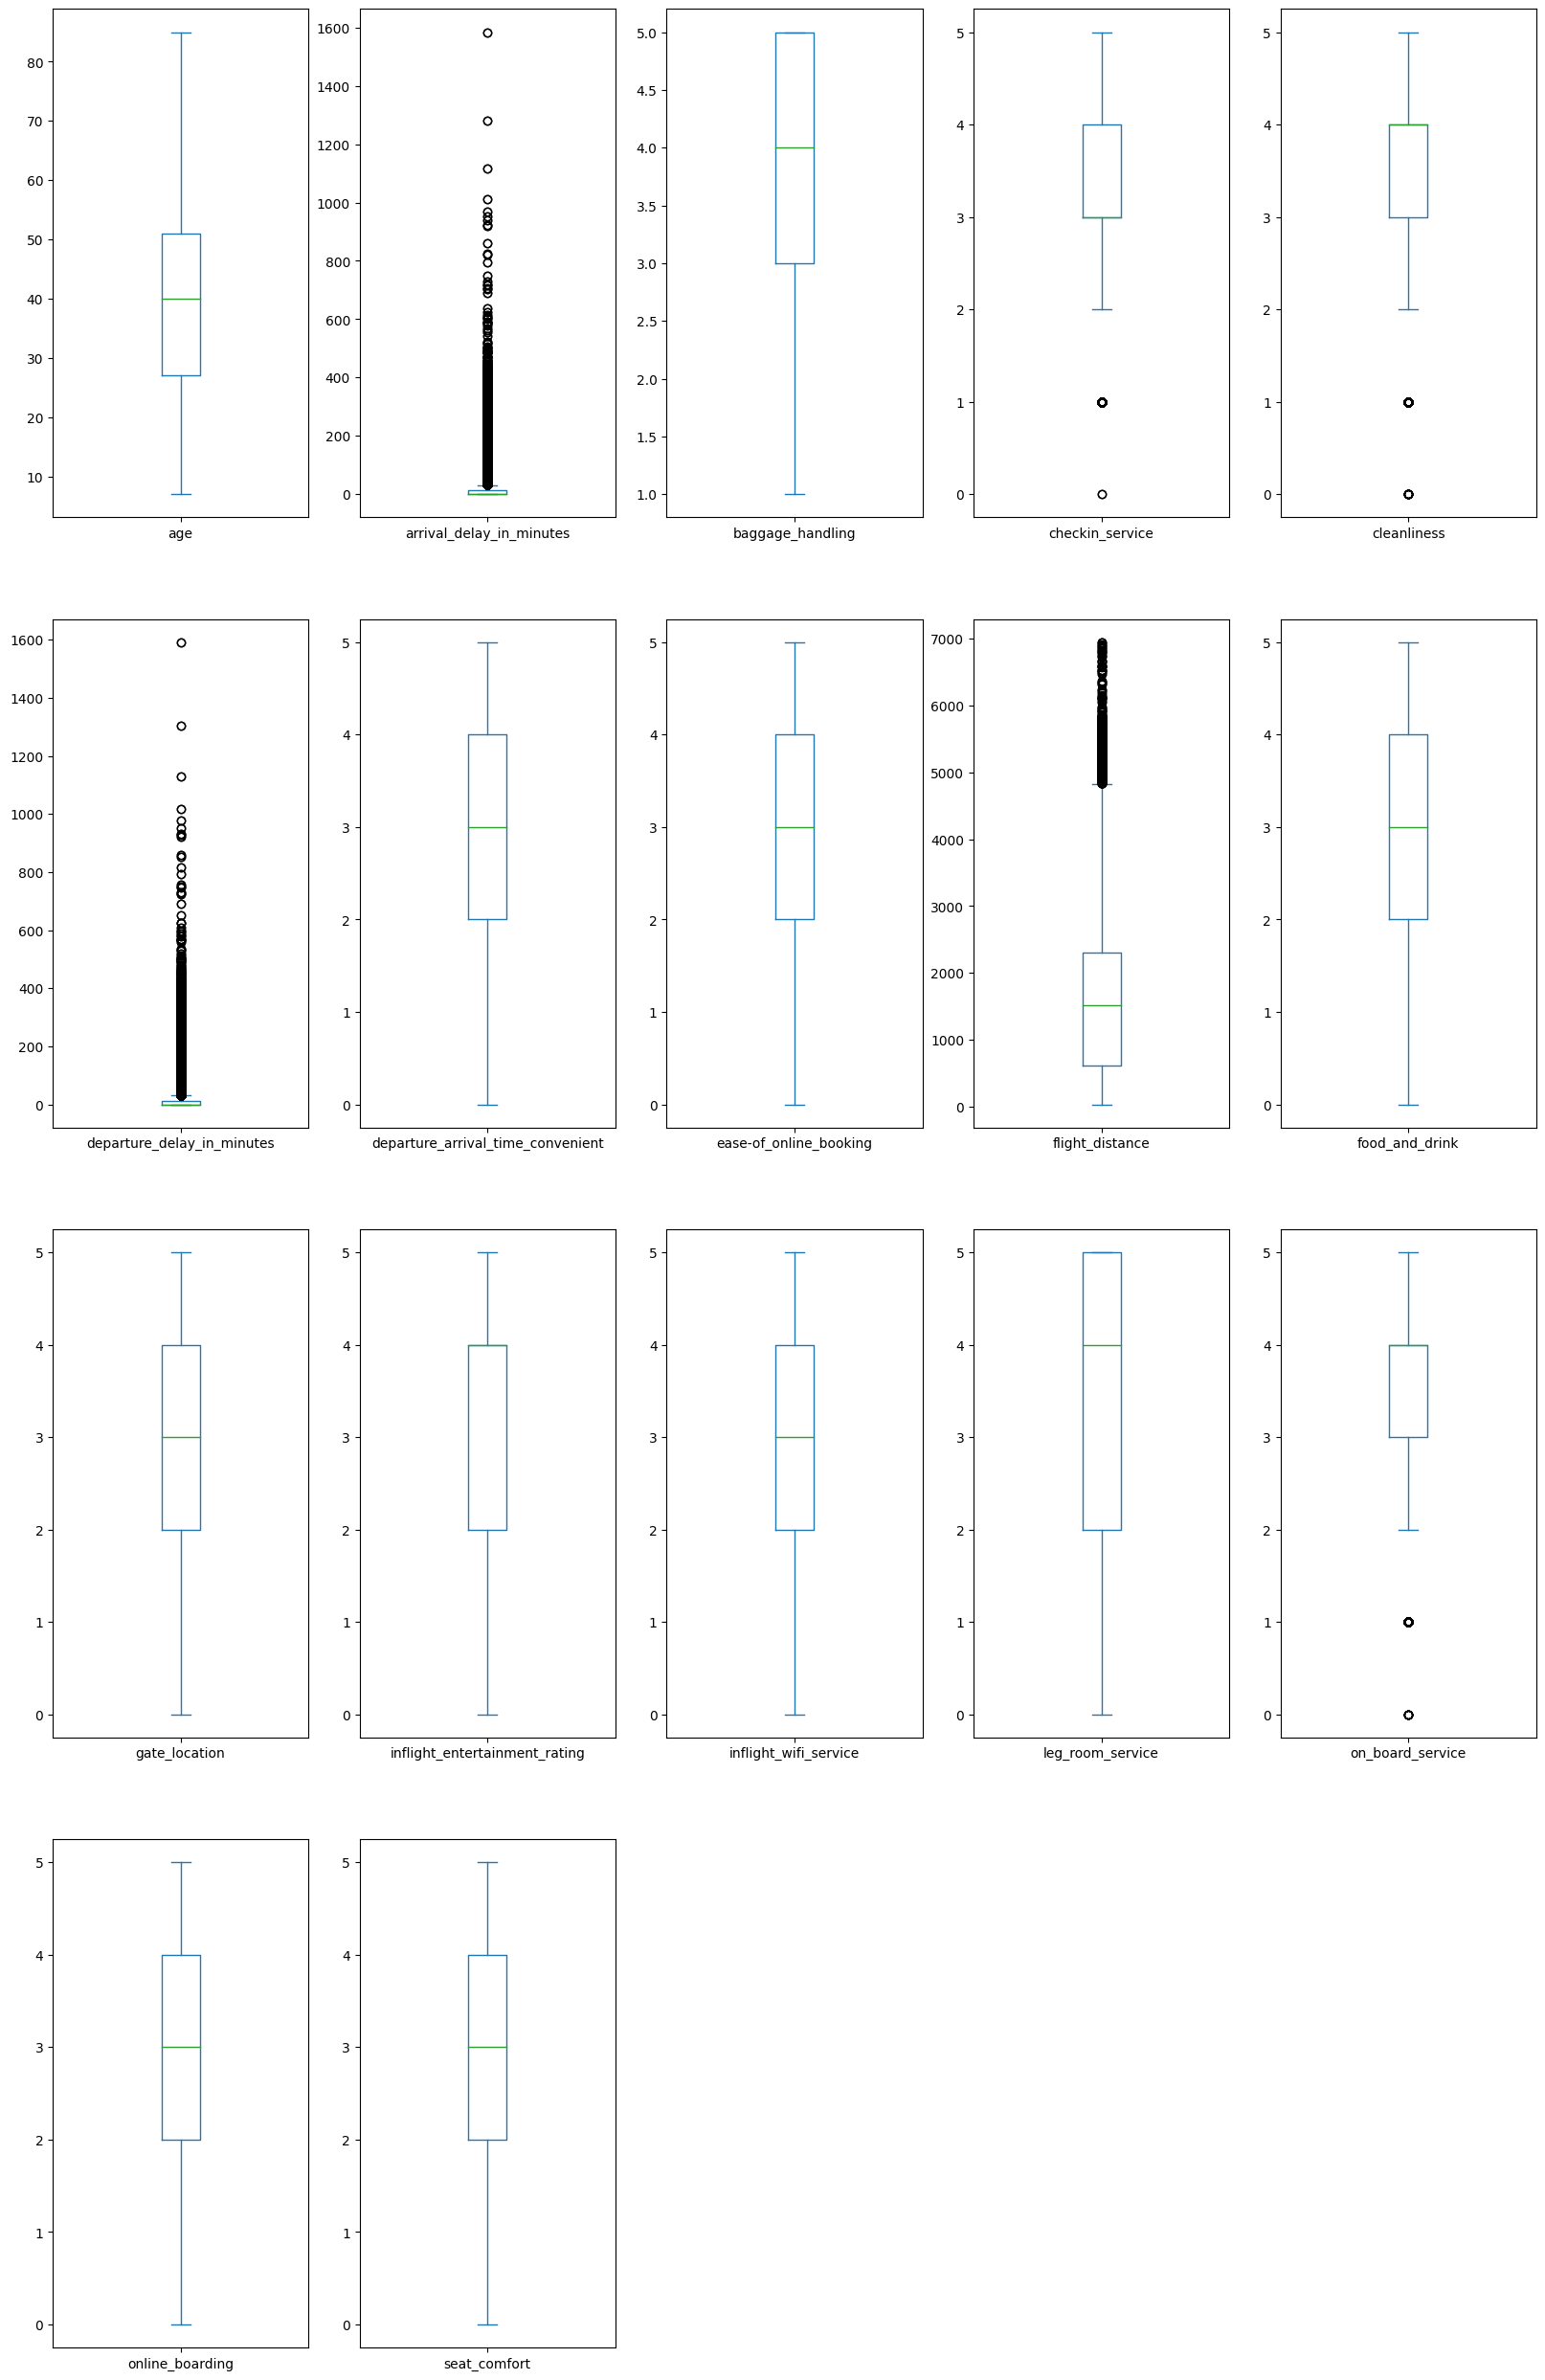

In [ ]:
plt.figure(figsize=(20, 40))
data.plot(kind='box', subplots=True, layout=(5, 5), figsize=(20, 40))
plt.show()

## **Phân tích thống kê mô tả**

### **Dữ liệu numeric**

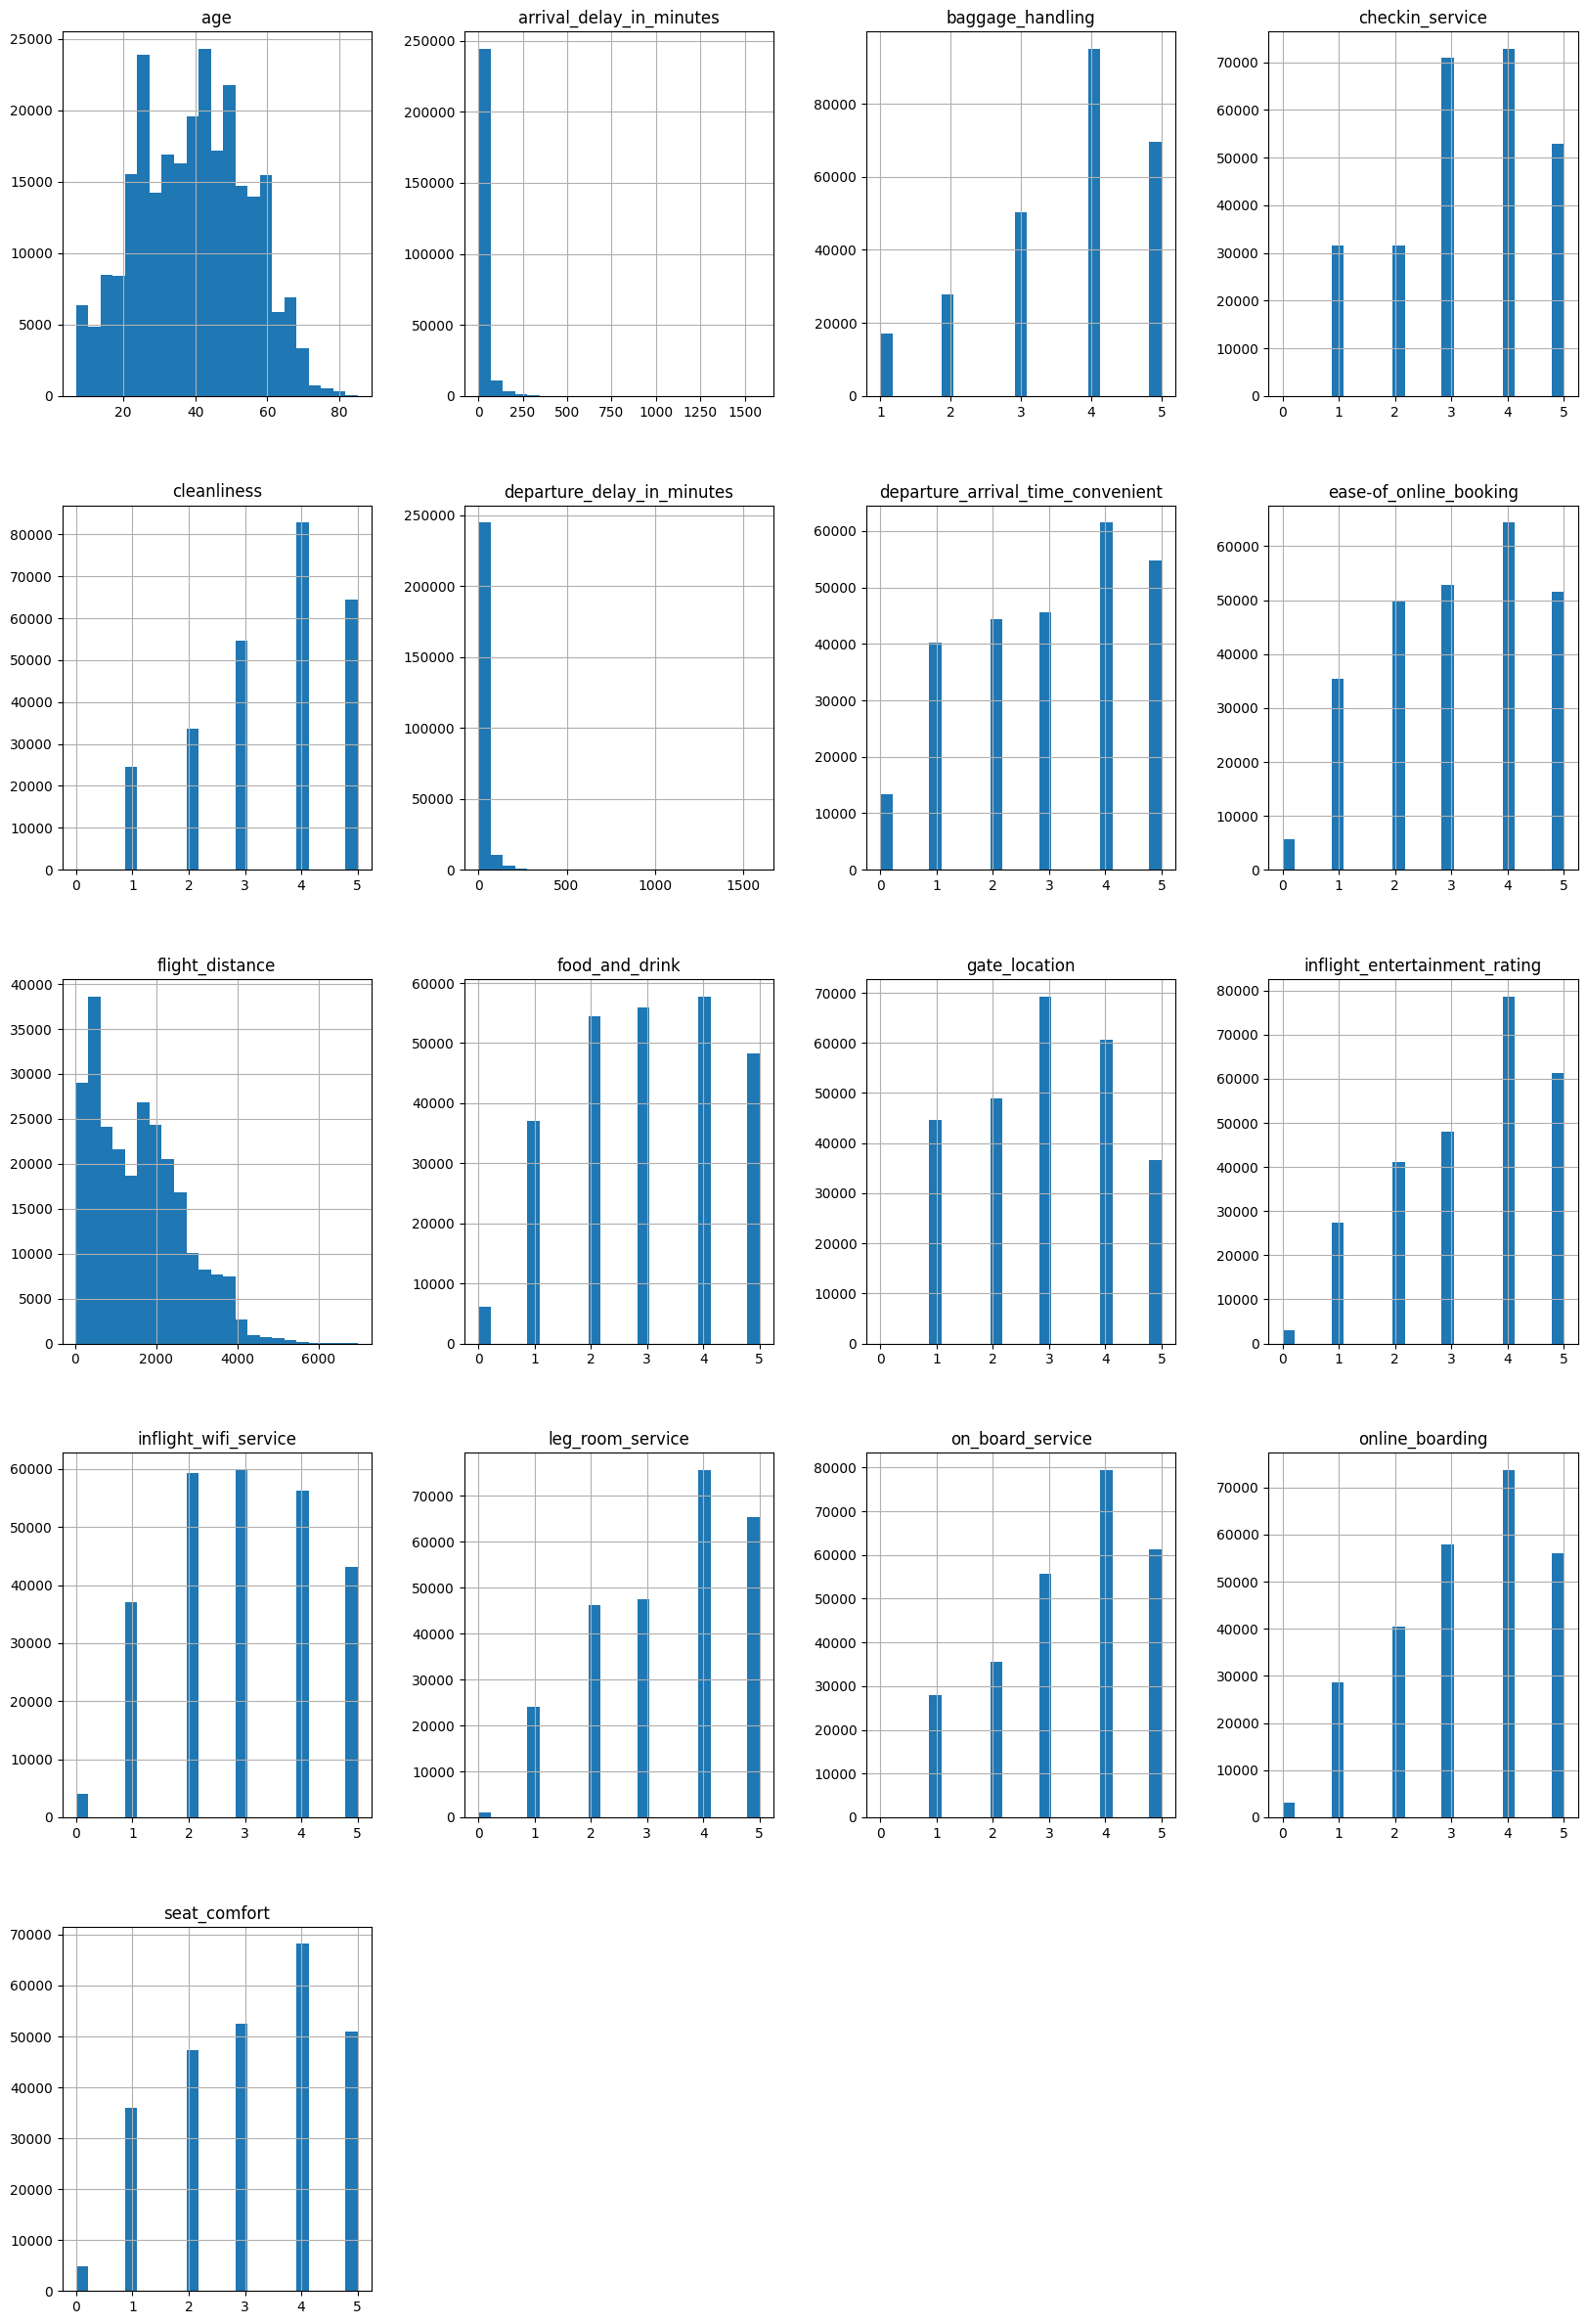

In [ ]:
data.hist(bins=23,figsize=(20,30));

### **Dữ liệu hạng mục**

In [ ]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

cat_features = data.select_dtypes(include='object').columns
unique_values(data, cat_features)

Column: class
------------------------------
Unique Values (3): ['Eco' 'Eco Plus' 'Business']

Value Counts:
class
Business    124318
Eco         116618
Eco Plus     18822
Name: count, dtype: int64

Column: customer_type
------------------------------
Unique Values (2): ['Loyal Customer' 'disloyal Customer']

Value Counts:
customer_type
Loyal Customer       212198
disloyal Customer     47560
Name: count, dtype: int64

Column: travel_type
------------------------------
Unique Values (2): ['Personal Travel' 'Business travel']

Value Counts:
travel_type
Business travel    179384
Personal Travel     80374
Name: count, dtype: int64

Column: satisfaction
------------------------------
Unique Values (2): ['dissatisfied' 'satisfied']

Value Counts:
satisfaction
dissatisfied    132245
satisfied       127513
Name: count, dtype: int64



**Class**

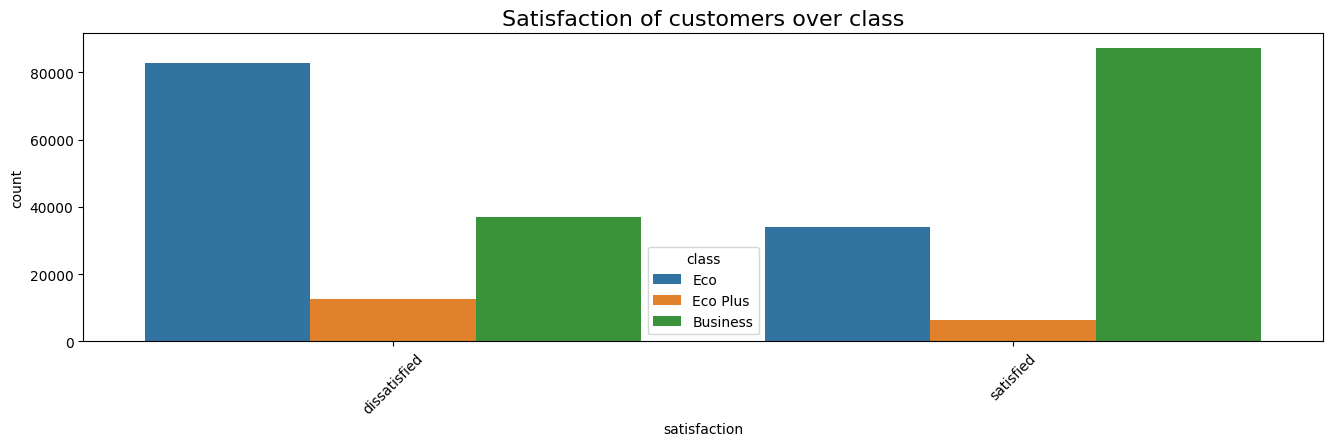

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x='satisfaction',data=data,hue='class')
plt.xticks(rotation=45)
plt.title('Satisfaction of customers over class',fontdict={'fontsize':16})
plt.show()

**Travel Type**

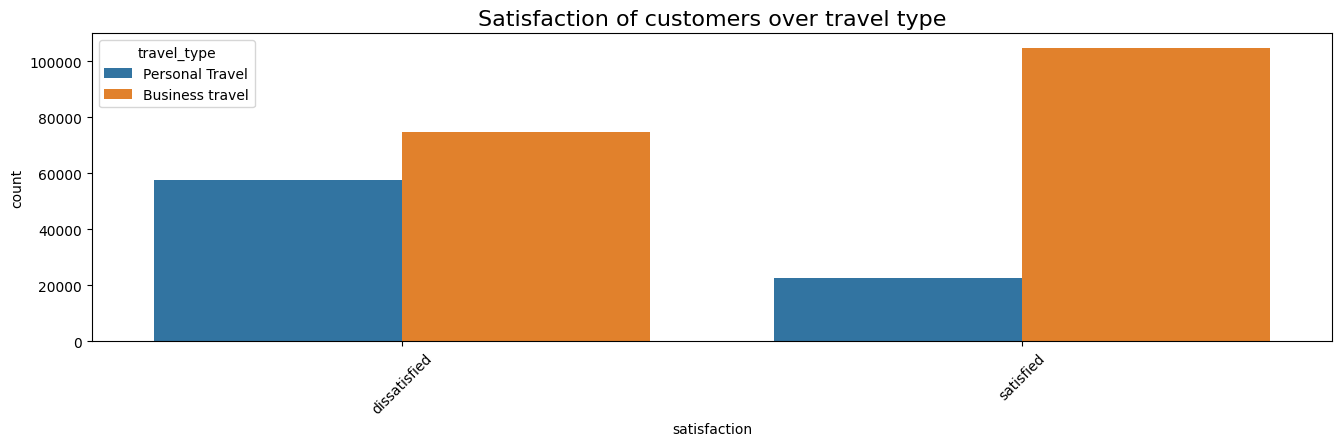

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x='satisfaction',data=data,hue='travel_type')
plt.xticks(rotation=45)
plt.title('Satisfaction of customers over travel type',fontdict={'fontsize':16})
plt.show()

**Customer Type**

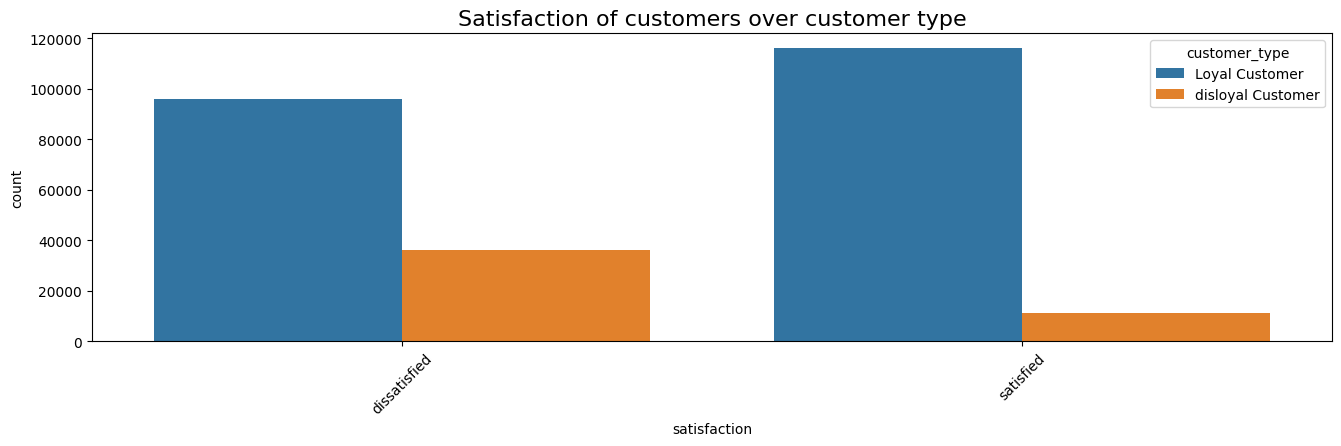

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x='satisfaction',data=data,hue='customer_type')
plt.xticks(rotation=45)
plt.title('Satisfaction of customers over customer type',fontdict={'fontsize':16})
plt.show()

**Biểu đồ thể hiện tính phân loại của từng thuộc tính**

In [ ]:
df_satisfied = data[data['satisfaction'] == 'satisfied']
df_dissatisfied = data[data['satisfaction'] != 'satisfied']

In [ ]:
columns = data.columns
columns

Index(['age', 'arrival_delay_in_minutes', 'baggage_handling',
       'checkin_service', 'class', 'cleanliness', 'customer_type',
       'departure_delay_in_minutes', 'departure_arrival_time_convenient',
       'ease-of_online_booking', 'flight_distance', 'food_and_drink',
       'gate_location', 'inflight_entertainment_rating',
       'inflight_wifi_service', 'leg_room_service', 'on_board_service',
       'online_boarding', 'seat_comfort', 'travel_type', 'satisfaction'],
      dtype='object')

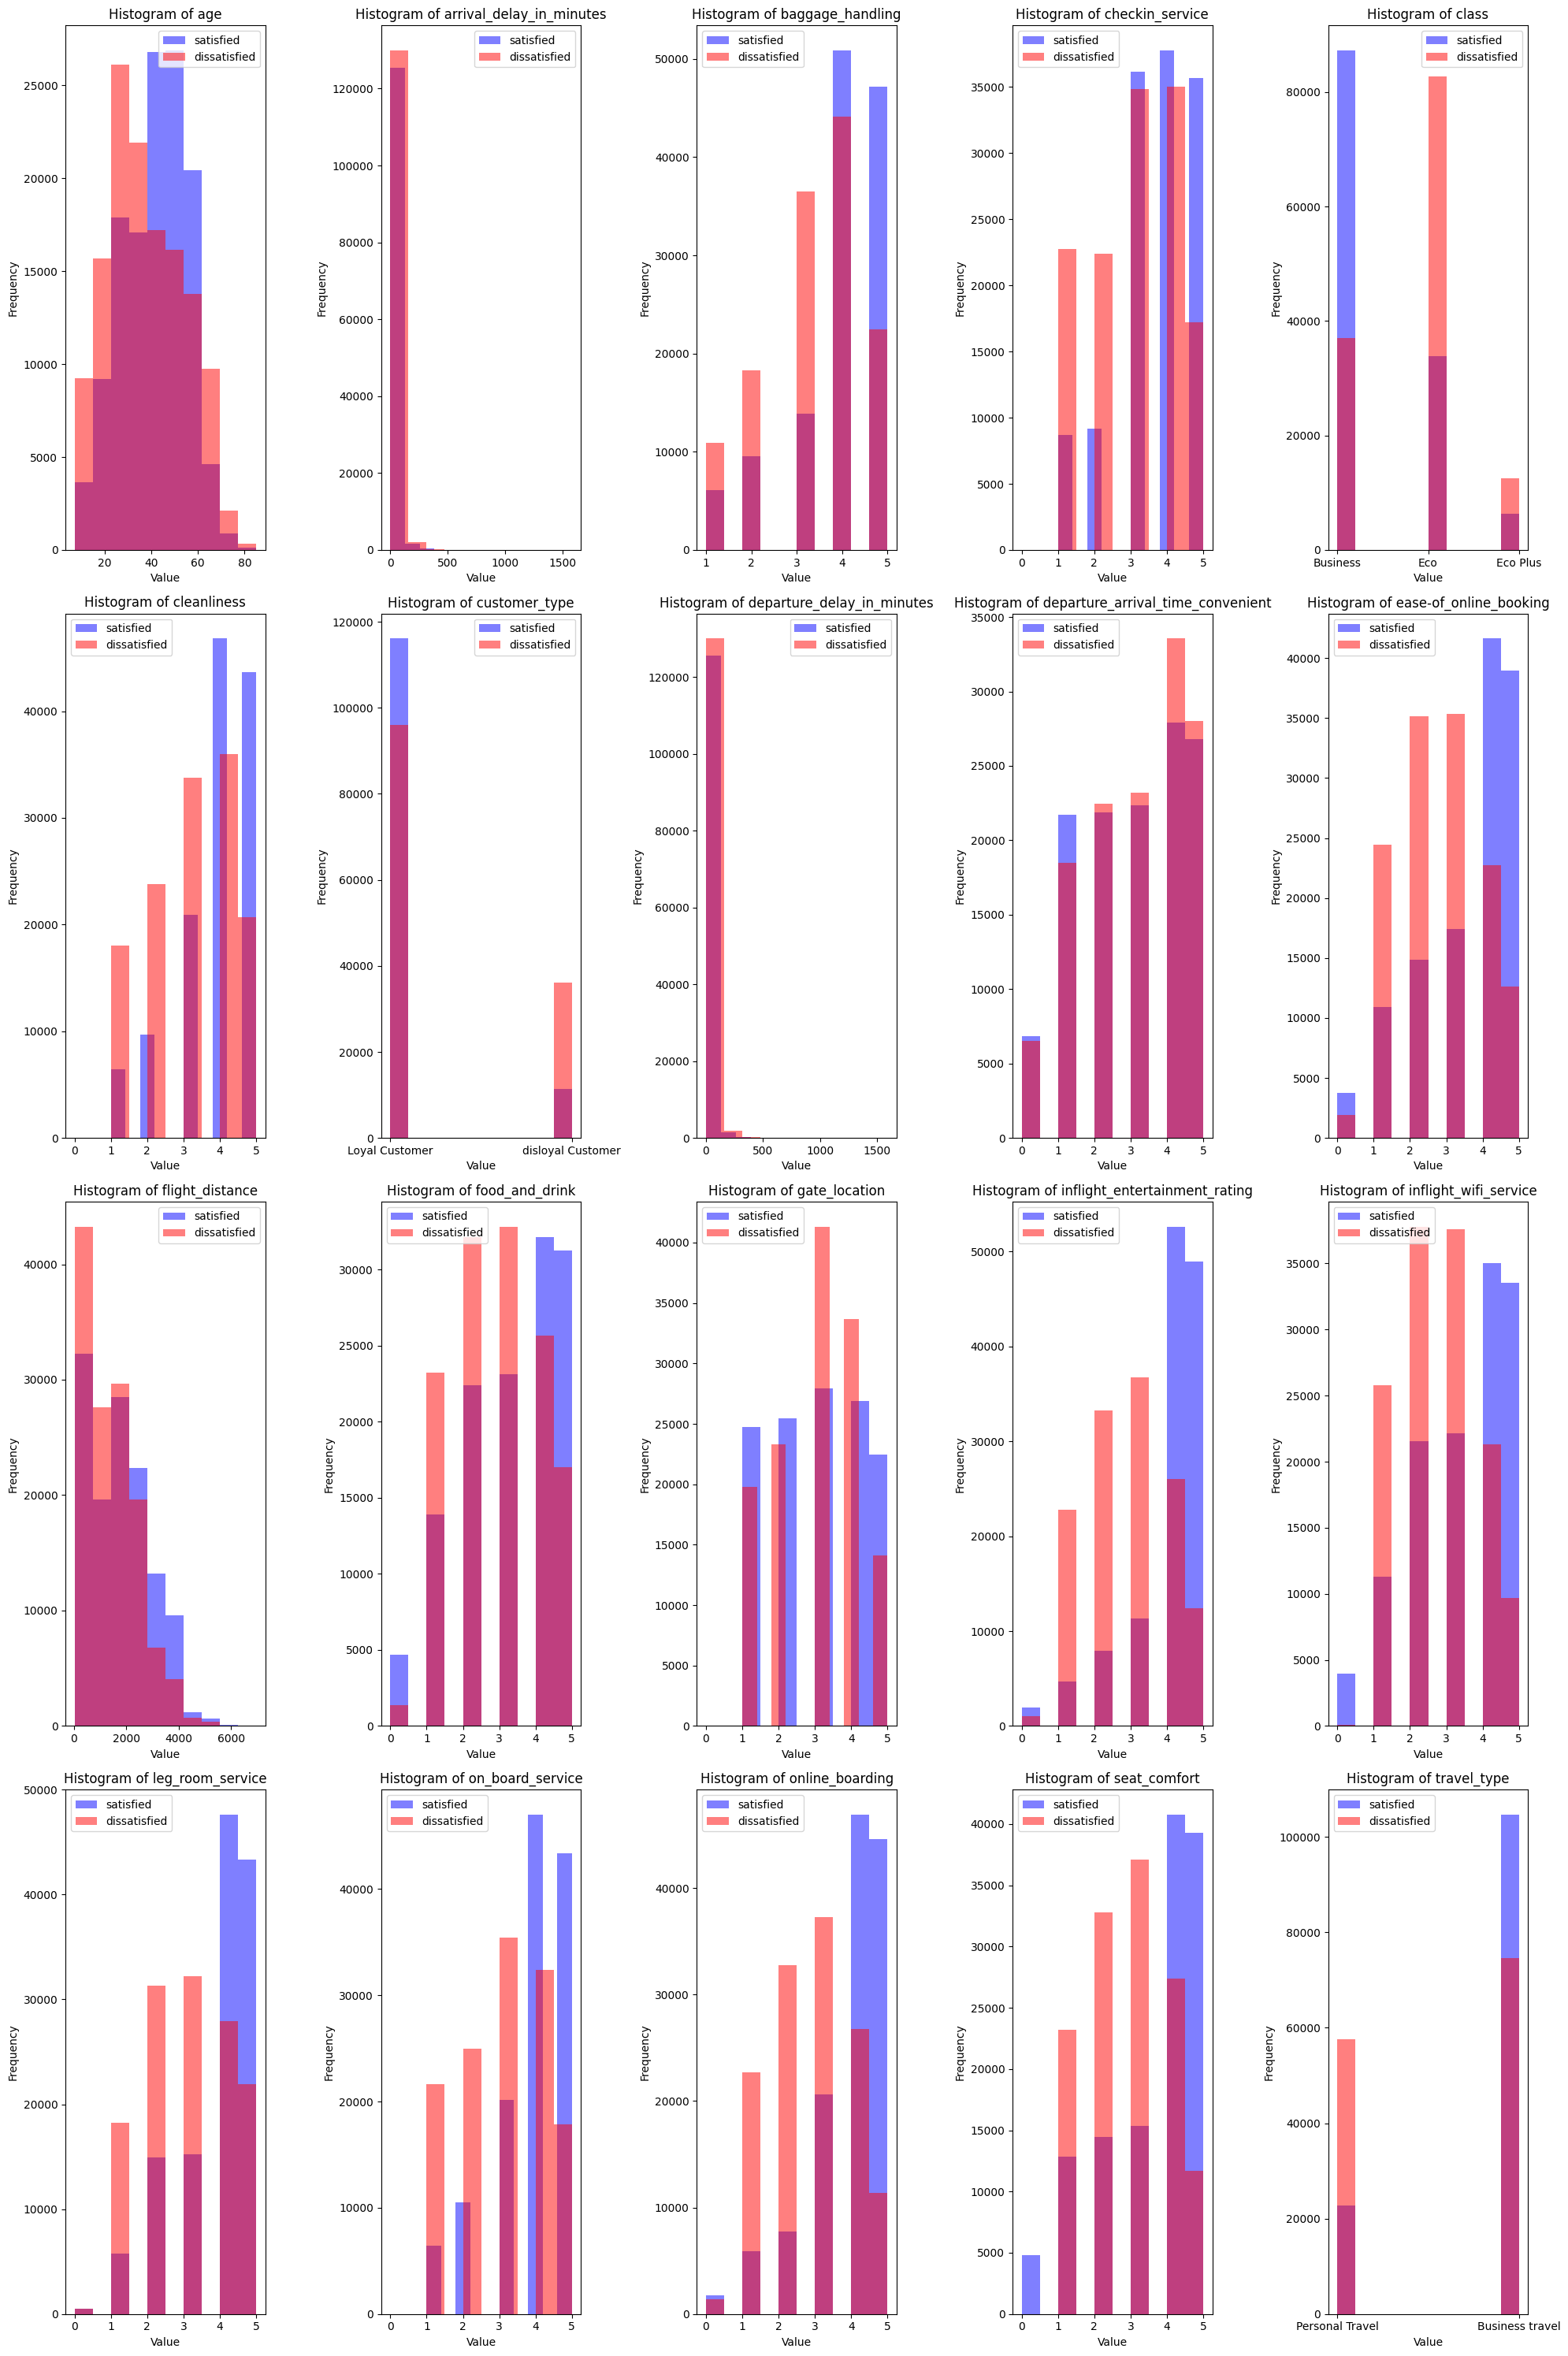

In [ ]:
# Tạo figure và hai subplot
fig, axs = plt.subplots(4, 5, figsize=(20, 30))
index = 0

for i in range(4):
  for j in range(5):
    if index == 20: break
    # Vẽ histogram cho Column1 trong satisfied và dissatisfied
    axs[i][j].hist(df_satisfied[columns[index]], bins=10, alpha=0.5, color='blue', label='satisfied')
    axs[i][j].hist(df_dissatisfied[columns[index]], bins=10, alpha=0.5, color='red', label='dissatisfied')
    axs[i][j].set_title('Histogram of ' + columns[index])
    axs[i][j].set_xlabel('Value')
    axs[i][j].set_ylabel('Frequency')
    axs[i][j].legend()
    index += 1

# plt.gca().set_xticklabels([])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## **Tiền xử lý dữ liệu**

In [ ]:
#data_backup sử dụng để tiền xử lý cho đợt sau
data_backup = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score,fbeta_score,make_scorer

### **Encoder Dữ liệu hạng mục**

In [ ]:
le = LabelEncoder()
print (le)
data.travel_type = le.fit_transform(data.travel_type)
data["class"] = le.fit_transform(data["class"])
data.satisfaction = le.fit_transform(data.satisfaction)
data.customer_type = le.fit_transform(data.customer_type)
data.head()

LabelEncoder()


,age,arrival_delay_in_minutes,baggage_handling,checkin_service,class,cleanliness,customer_type,departure_delay_in_minutes,departure_arrival_time_convenient,ease-of_online_booking,...,food_and_drink,gate_location,inflight_entertainment_rating,inflight_wifi_service,leg_room_service,on_board_service,online_boarding,seat_comfort,travel_type,satisfaction
0,7,0.000,1,1,1,1,0,0,5,1,...,1,2,1,1,4,2,1,1,1,0
1,7,0.000,1,1,1,2,0,0,1,2,...,2,1,2,2,5,3,2,2,1,0
2,7,0.000,1,1,1,2,0,0,1,4,...,2,1,2,4,1,2,4,2,1,0
3,7,0.000,1,1,1,3,0,0,4,2,...,3,2,3,2,3,5,2,3,1,0
4,7,0.000,1,1,1,3,0,0,5,2,...,3,3,3,2,4,4,2,3,1,0


### **Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"]])

In [ ]:
scaled_df = pd.DataFrame(scaled_df, columns=["age", "flight_distance", "departure_delay_in_minutes", "arrival_delay_in_minutes"])

In [ ]:
data["age"] = scaled_df["age"]
data["flight_distance"] = scaled_df["flight_distance"]
data["departure_delay_in_minutes"] = scaled_df["departure_delay_in_minutes"]
data["arrival_delay_in_minutes"] = scaled_df["arrival_delay_in_minutes"]

In [ ]:
data.isnull().sum()

age                                  2
arrival_delay_in_minutes             2
baggage_handling                     0
checkin_service                      0
class                                0
cleanliness                          0
customer_type                        0
departure_delay_in_minutes           2
departure_arrival_time_convenient    0
ease-of_online_booking               0
flight_distance                      2
food_and_drink                       0
gate_location                        0
inflight_entertainment_rating        0
inflight_wifi_service                0
leg_room_service                     0
on_board_service                     0
online_boarding                      0
seat_comfort                         0
travel_type                          0
satisfaction                         0
dtype: int64

In [ ]:
null_rows = data[data['age'].isnull()]
index_to_drop = null_rows.index[0]
data.drop(index=index_to_drop, inplace=True)

In [ ]:
null_rows = data[data['age'].isnull()]
index_to_drop = null_rows.index[0]
data.drop(index=index_to_drop, inplace=True)

In [ ]:
data.isnull().sum()

age                                  0
arrival_delay_in_minutes             0
baggage_handling                     0
checkin_service                      0
class                                0
cleanliness                          0
customer_type                        0
departure_delay_in_minutes           0
departure_arrival_time_convenient    0
ease-of_online_booking               0
flight_distance                      0
food_and_drink                       0
gate_location                        0
inflight_entertainment_rating        0
inflight_wifi_service                0
leg_room_service                     0
on_board_service                     0
online_boarding                      0
seat_comfort                         0
travel_type                          0
satisfaction                         0
dtype: int64

### **Chia tập train và test**

In [ ]:
X = data.drop(['satisfaction'], axis=1)
y = data['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Xây dựng và cải tiến mô hình**

## **Logistic Regression**

**LR 1.0**

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
logreg = LogisticRegression()
start_time = time.time()
logreg.fit(X_train, y_train)
training_time = time.time() - start_time

In [ ]:
y_pred_train = logreg.predict(X_train)
start_time = time.time()
y_pred_test = logreg.predict(X_test)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  0.8289493946218552
Accuracy score of the test data is  0.8307861102556205
Precision score of the test data is  0.8385070365082602
Recore score of the test data is  0.8096738616669292
F1-score score of the test data is  0.8238382461976235
Training time: 3.673628330230713 seconds
Prediction time: 0.023593902587890625 seconds


## **K-nearest neighborhood**

**KNN 1.0**

In [ ]:
#n = 1
knn = KNeighborsClassifier(n_neighbors=1)
start_time = time.time()
knn.fit(X_train, y_train)
training_time = time.time() - start_time

In [ ]:
y_pred_train = knn.predict(X_train)
start_time = time.time()
y_pred_test = knn.predict(X_test)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  1.0
Accuracy score of the test data is  0.9125731444410224
Precision score of the test data is  0.9136767740911256
Recore score of the test data is  0.9067669765243422
F1-score score of the test data is  0.9102087616637672
Training time: 0.13244414329528809 seconds
Prediction time: 64.87303447723389 seconds


## **Random Forest**

**RF 1.0**

In [ ]:
#n = 5
rf = RandomForestClassifier(n_estimators=5, random_state=0, n_jobs=-1)
start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time

In [ ]:
y_pred_train = rf.predict(X_train)
start_time = time.time()
y_pred_test = rf.predict(X_test)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  0.9933254412812073
Accuracy score of the test data is  0.9369995380351094
Precision score of the test data is  0.9423530823698844
Recore score of the test data is  0.9278399243737199
F1-score score of the test data is  0.9350401905328967
Training time: 1.825681447982788 seconds
Prediction time: 0.1197512149810791 seconds


**RF 1.1**

In [ ]:
#n = 20
rf = RandomForestClassifier(n_estimators=20, random_state=0, n_jobs=-1)
start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time

In [ ]:
y_pred_train = rf.predict(X_train)
start_time = time.time()
y_pred_test = rf.predict(X_test)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  0.9992011703335836
Accuracy score of the test data is  0.9479519556513705
Precision score of the test data is  0.9602710818927035
Recore score of the test data is  0.9320545139435954
F1-score score of the test data is  0.9459524285428742
Training time: 5.610770225524902 seconds
Prediction time: 0.346707820892334 seconds


### **Thống kê và phân tích lỗi dựa trên mô hình được chọn là RF 1.1**

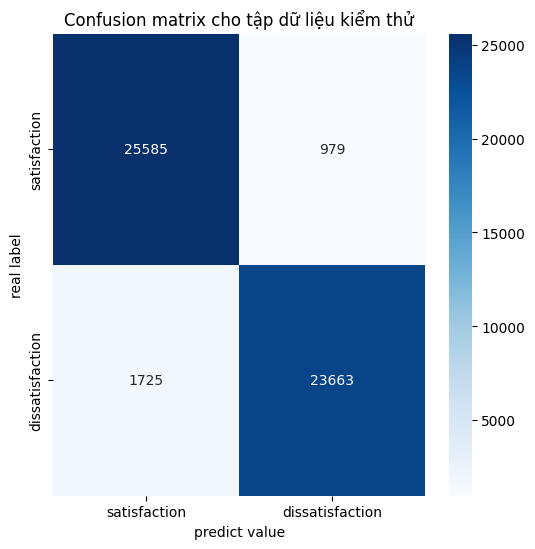

In [ ]:
# Tính toán confusion matrixy_true
cm = confusion_matrix(y_test, y_pred_test)

# Vẽ confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['satisfaction', 'dissatisfaction'], yticklabels=['satisfaction', 'dissatisfaction'])
plt.xlabel('predict value')
plt.ylabel('real label')
plt.title('Confusion matrix cho tập dữ liệu kiểm thử')
plt.show()

In [ ]:
error_data = X_test.copy()
error_data['real_label'] = y_test
error_data['predicted_label'] = y_pred_test
error_data

,age,arrival_delay_in_minutes,baggage_handling,checkin_service,class,cleanliness,customer_type,departure_delay_in_minutes,departure_arrival_time_convenient,ease-of_online_booking,...,gate_location,inflight_entertainment_rating,inflight_wifi_service,leg_room_service,on_board_service,online_boarding,seat_comfort,travel_type,real_label,predicted_label
253439,1.625,-0.314,4,3,1,4,0,0.008,2,4,...,2,2,1,4,4,3,4,1,1,1
54000,-0.227,0.103,3,3,0,1,0,-0.150,2,2,...,2,4,2,4,4,2,2,0,1,1
52110,-0.227,-0.392,3,1,1,3,1,-0.386,2,2,...,3,3,2,5,1,2,3,0,0,0
237378,1.030,-0.392,5,5,0,5,0,-0.386,1,5,...,1,1,2,5,5,1,1,0,1,1
64616,0.038,-0.392,3,4,1,4,0,-0.386,1,1,...,1,4,4,1,5,4,4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97132,0.765,-0.392,4,4,0,5,0,-0.229,1,1,...,1,4,1,5,4,4,5,0,1,1
88582,0.567,-0.392,3,5,0,4,0,-0.386,3,3,...,3,3,3,4,3,4,4,0,1,1
188365,-0.094,-0.392,4,4,1,3,1,-0.386,2,1,...,4,1,1,5,3,1,1,0,0,0
49093,-0.359,0.806,5,5,0,5,1,0.796,3,3,...,3,5,3,3,4,3,5,0,0,0


In [ ]:
error_data['check'] = error_data['real_label'] == error_data['predicted_label']
error_data

,age,arrival_delay_in_minutes,baggage_handling,checkin_service,class,cleanliness,customer_type,departure_delay_in_minutes,departure_arrival_time_convenient,ease-of_online_booking,...,inflight_entertainment_rating,inflight_wifi_service,leg_room_service,on_board_service,online_boarding,seat_comfort,travel_type,real_label,predicted_label,check
253439,1.625,-0.314,4,3,1,4,0,0.008,2,4,...,2,1,4,4,3,4,1,1,1,True
54000,-0.227,0.103,3,3,0,1,0,-0.150,2,2,...,4,2,4,4,2,2,0,1,1,True
52110,-0.227,-0.392,3,1,1,3,1,-0.386,2,2,...,3,2,5,1,2,3,0,0,0,True
237378,1.030,-0.392,5,5,0,5,0,-0.386,1,5,...,1,2,5,5,1,1,0,1,1,True
64616,0.038,-0.392,3,4,1,4,0,-0.386,1,1,...,4,4,1,5,4,4,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97132,0.765,-0.392,4,4,0,5,0,-0.229,1,1,...,4,1,5,4,4,5,0,1,1,True
88582,0.567,-0.392,3,5,0,4,0,-0.386,3,3,...,3,3,4,3,4,4,0,1,1,True
188365,-0.094,-0.392,4,4,1,3,1,-0.386,2,1,...,1,1,5,3,1,1,0,0,0,True
49093,-0.359,0.806,5,5,0,5,1,0.796,3,3,...,5,3,3,4,3,5,0,0,0,True


In [ ]:
error_data = error_data[error_data['check'] == False]

In [ ]:
error_data.shape

(2704, 23)

In [ ]:
error_data.drop(columns=['check'], inplace=True)
error_data.drop(columns=['real_label'], inplace=True)
error_data.drop(columns=['predicted_label'], inplace=True)

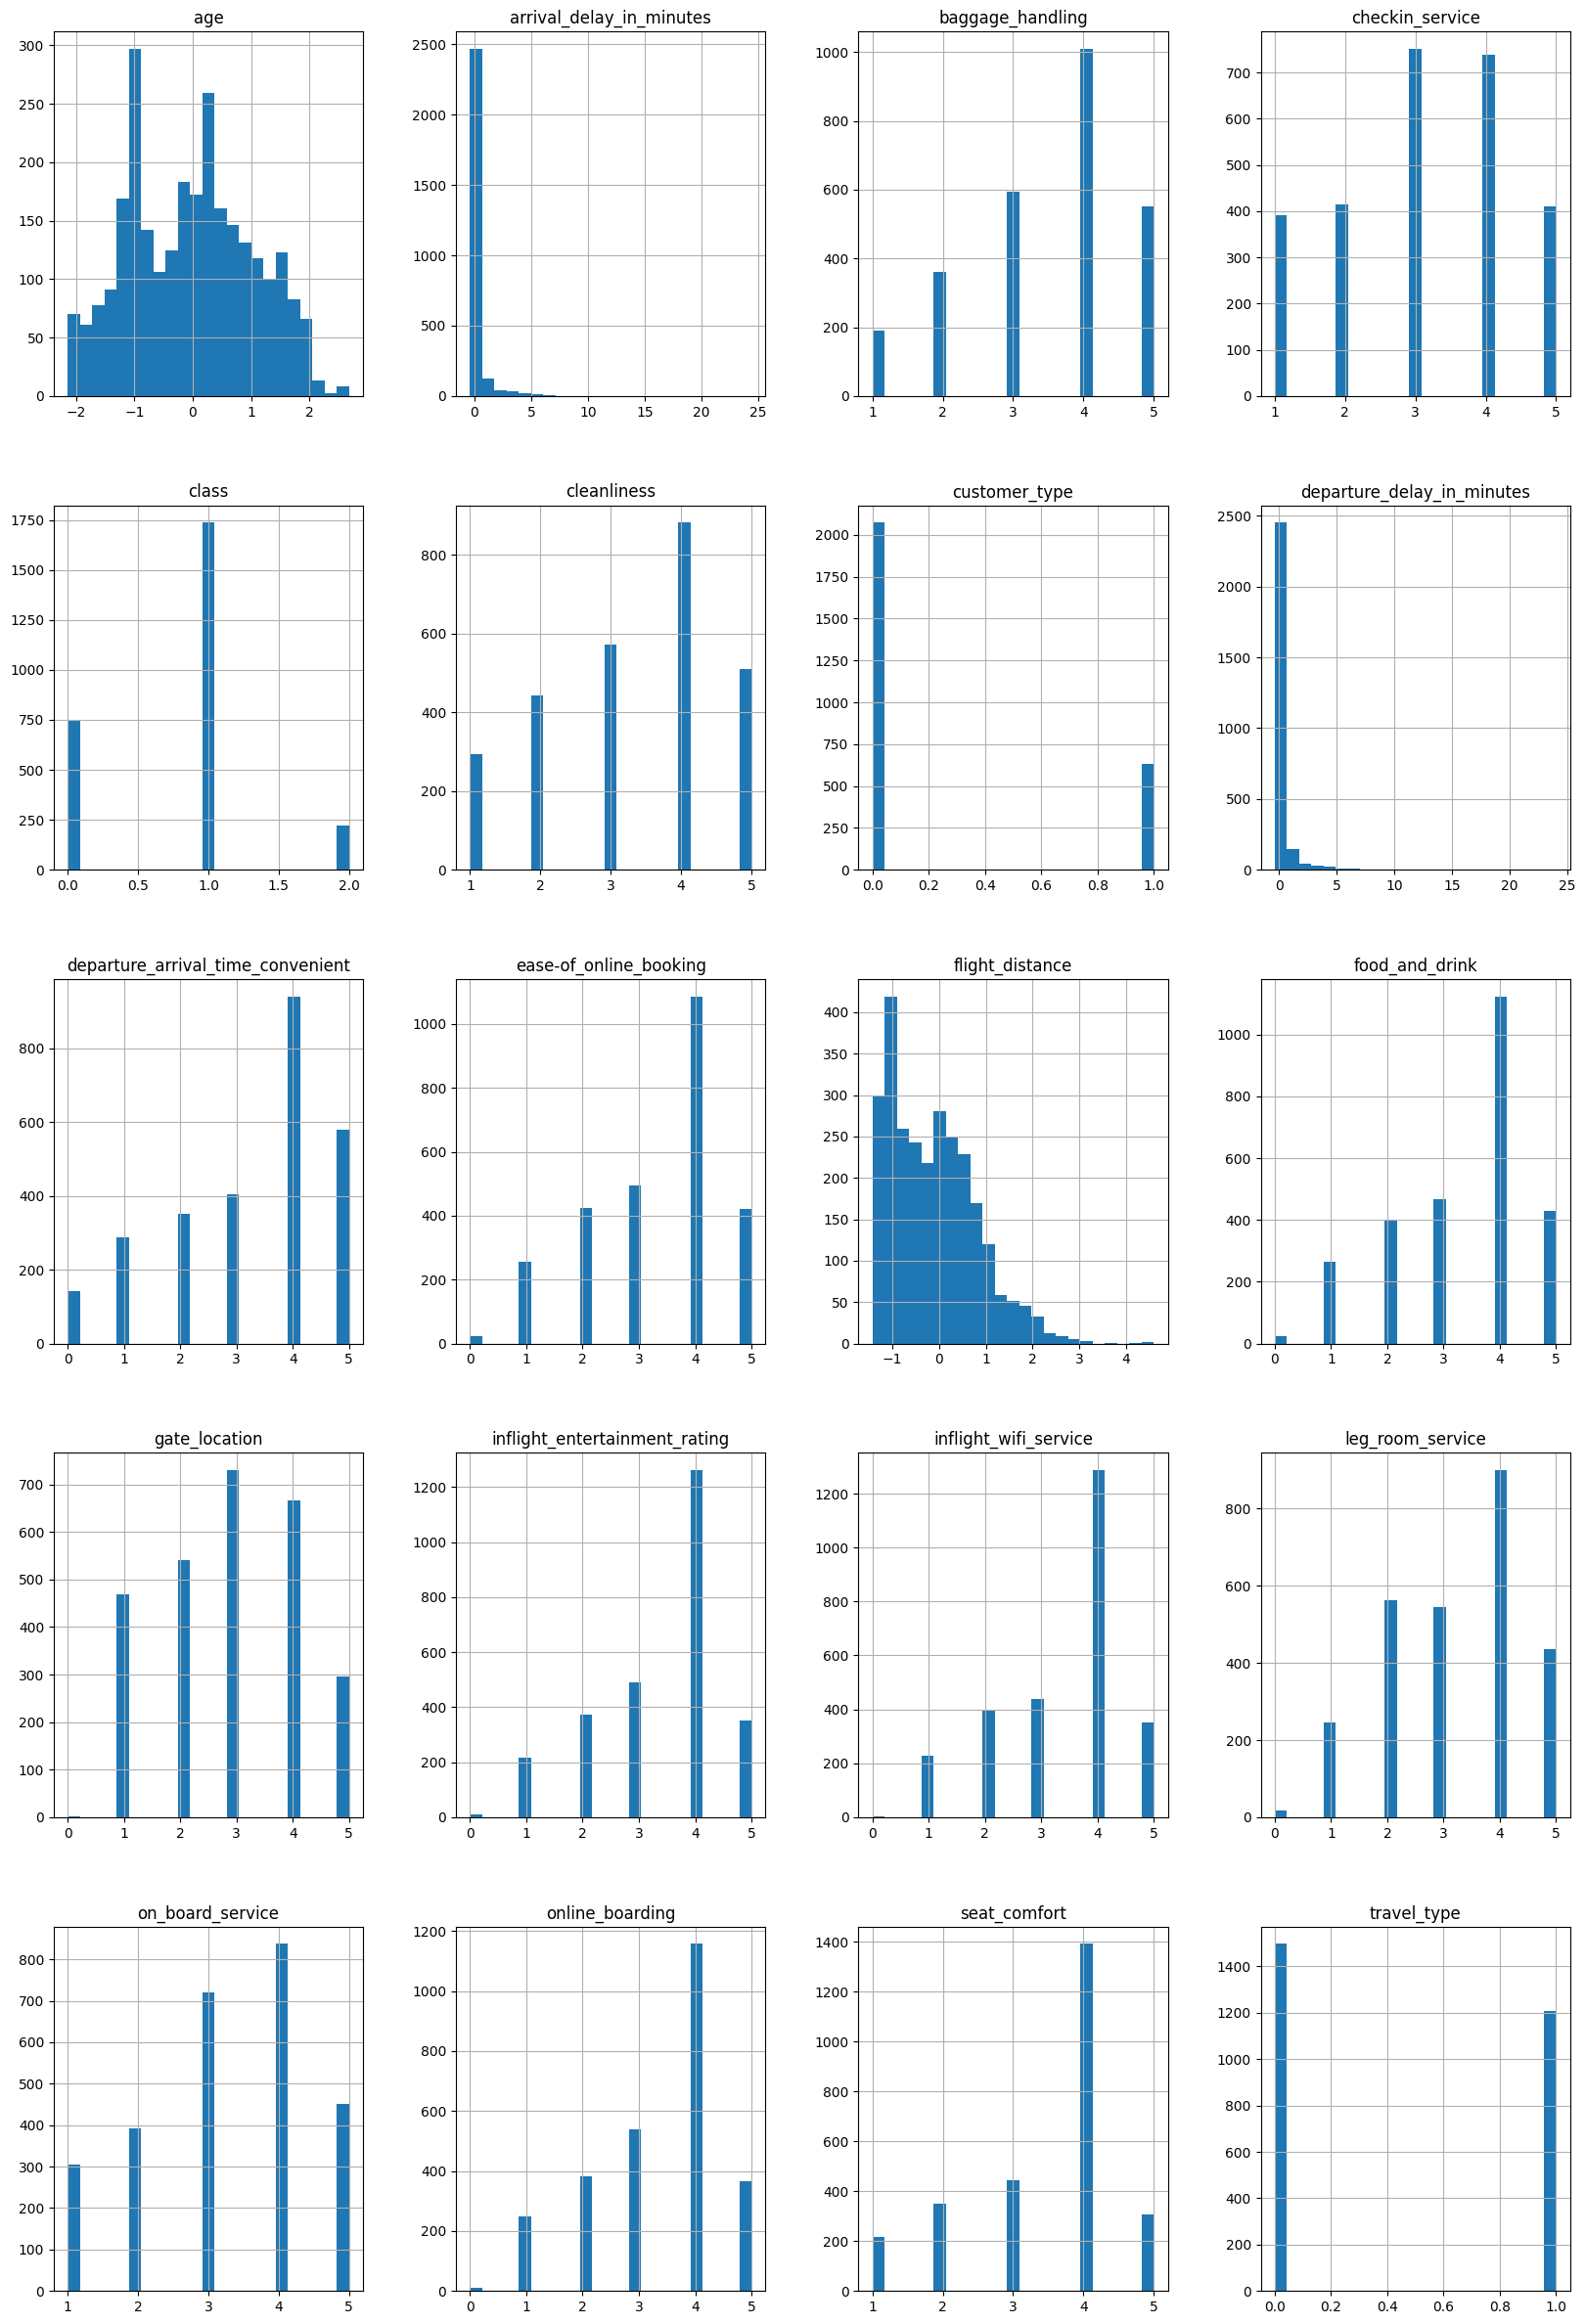

In [ ]:
error_data.hist(bins=23,figsize=(20,30));

**RF 1.2**

In [ ]:
#n = 100
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
start_time = time.time()
rf.fit(X_train, y_train)
training_time = time.time() - start_time

In [ ]:
y_pred_train = rf.predict(X_train)
start_time = time.time()
y_pred_test = rf.predict(X_test)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  1.0
Accuracy score of the test data is  0.9518209116107176
Precision score of the test data is  0.9621178466136263
Recore score of the test data is  0.9383567039546242
F1-score score of the test data is  0.9500887355680073
Training time: 38.081998109817505 seconds
Prediction time: 4.81577730178833 seconds


## **Tiền xử lý dữ liệu trước khi đưa vào mạng neural**

In [ ]:
X_train_backup = X_train.copy()
X_test_backup = X_test.copy()
y_train_backup = y_train.copy()
y_test_backup = y_test.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Mã hóa các cột hạng mục
categorical_columns = ['customer_type', 'travel_type', 'class']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data_backup[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Kết hợp với các cột số nguyên khác
numerical_data = data_backup.drop(columns=categorical_columns + ['satisfaction'])
final_data = pd.concat([numerical_data.reset_index(drop=True), encoded_df], axis=1)

# Mã hóa cột nhãn
label_encoder = OneHotEncoder(sparse=False)
labels = label_encoder.fit_transform(data_backup[['satisfaction']])

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(207806, 21)

## **ANN**

In [ ]:
import tensorflow as tf

**ANN 1.0**

In [ ]:
# Define the neural network model (unchanged)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(21,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model (unchanged)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using dense arrays
start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=64)
training_time = time.time() - start_time

Epoch 1/10
3247/3247 [==============================] - 7s 2ms/step - loss: 0.2770 - accuracy: 0.8828
Epoch 2/10
3247/3247 [==============================] - 5s 2ms/step - loss: 0.2115 - accuracy: 0.9131
Epoch 3/10
3247/3247 [==============================] - 7s 2ms/step - loss: 0.1920 - accuracy: 0.9213
Epoch 4/10
3247/3247 [==============================] - 5s 2ms/step - loss: 0.1784 - accuracy: 0.9278
Epoch 5/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1702 - accuracy: 0.9310
Epoch 6/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1645 - accuracy: 0.9334
Epoch 7/10
3247/3247 [==============================] - 5s 2ms/step - loss: 0.1605 - accuracy: 0.9349
Epoch 8/10
3247/3247 [==============================] - 7s 2ms/step - loss: 0.1574 - accuracy: 0.9358
Epoch 9/10
3247/3247 [==============================] - 5s 2ms/step - loss: 0.1541 - accuracy: 0.9366
Epoch 10/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.151

In [ ]:
accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on validation data: {accuracy}')

In [ ]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Đánh giá chi tiết
from sklearn.metrics import classification_report

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.categories_[0]))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

1624/1624 [==============================] - 3s 2ms/step - loss: 0.1562 - accuracy: 0.9347
Loss: 0.1561649739742279, Accuracy: 0.9347474575042725
1624/1624 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

dissatisfied       0.92      0.95      0.94     26547
   satisfied       0.95      0.92      0.93     25405

    accuracy                           0.93     51952
   macro avg       0.94      0.93      0.93     51952
weighted avg       0.94      0.93      0.93     51952

Training time: 83.10147714614868 seconds
Prediction time: 2.663177967071533 seconds


**ANN 1.1**

In [ ]:
# Define the neural network model (unchanged)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(21,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model (unchanged)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using dense arrays
start_time = time.time()
model.fit(X_train, y_train, epochs=100, batch_size=64)
training_time = time.time() - start_time

Epoch 1/100
3247/3247 [==============================] - 6s 2ms/step - loss: 0.2788 - accuracy: 0.8818
Epoch 2/100
3247/3247 [==============================] - 12s 4ms/step - loss: 0.2123 - accuracy: 0.9126
Epoch 3/100
3247/3247 [==============================] - 13s 4ms/step - loss: 0.1919 - accuracy: 0.9208
Epoch 4/100
3247/3247 [==============================] - 9s 3ms/step - loss: 0.1811 - accuracy: 0.9253
Epoch 5/100
3247/3247 [==============================] - 14s 4ms/step - loss: 0.1741 - accuracy: 0.9279
Epoch 6/100
3247/3247 [==============================] - 11s 3ms/step - loss: 0.1682 - accuracy: 0.9304
Epoch 7/100
3247/3247 [==============================] - 5s 2ms/step - loss: 0.1632 - accuracy: 0.9332
Epoch 8/100
3247/3247 [==============================] - 7s 2ms/step - loss: 0.1592 - accuracy: 0.9341
Epoch 9/100
3247/3247 [==============================] - 5s 2ms/step - loss: 0.1560 - accuracy: 0.9356
Epoch 10/100
3247/3247 [==============================] - 6s 2ms/step

In [ ]:
accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on validation data: {accuracy}')

In [ ]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Đánh giá chi tiết
from sklearn.metrics import classification_report

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.categories_[0]))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

1624/1624 [==============================] - 2s 1ms/step - loss: 0.1344 - accuracy: 0.9439
Loss: 0.13435398042201996, Accuracy: 0.9439290165901184
1624/1624 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

dissatisfied       0.94      0.95      0.95     26547
   satisfied       0.95      0.94      0.94     25405

    accuracy                           0.94     51952
   macro avg       0.94      0.94      0.94     51952
weighted avg       0.94      0.94      0.94     51952

Training time: 639.2474553585052 seconds
Prediction time: 2.674595355987549 seconds


**ANN 1.2**

In [ ]:
# Define the neural network model (unchanged)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(21,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model (unchanged)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using dense arrays
start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=64)
training_time = time.time() - start_time

Epoch 1/10
3247/3247 [==============================] - 7s 2ms/step - loss: 0.2331 - accuracy: 0.9024
Epoch 2/10
3247/3247 [==============================] - 8s 3ms/step - loss: 0.1676 - accuracy: 0.9304
Epoch 3/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1487 - accuracy: 0.9374
Epoch 4/10
3247/3247 [==============================] - 9s 3ms/step - loss: 0.1386 - accuracy: 0.9416
Epoch 5/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1301 - accuracy: 0.9451
Epoch 6/10
3247/3247 [==============================] - 9s 3ms/step - loss: 0.1249 - accuracy: 0.9473
Epoch 7/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1207 - accuracy: 0.9492
Epoch 8/10
3247/3247 [==============================] - 8s 3ms/step - loss: 0.1167 - accuracy: 0.9502
Epoch 9/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1141 - accuracy: 0.9516
Epoch 10/10
3247/3247 [==============================] - 8s 3ms/step - loss: 0.111

In [ ]:
accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on validation data: {accuracy}')

In [ ]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Đánh giá chi tiết
from sklearn.metrics import classification_report

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.categories_[0]))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

1624/1624 [==============================] - 4s 2ms/step - loss: 0.1294 - accuracy: 0.9444
Loss: 0.12936407327651978, Accuracy: 0.9443717002868652
1624/1624 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

dissatisfied       0.94      0.95      0.95     26547
   satisfied       0.95      0.93      0.94     25405

    accuracy                           0.94     51952
   macro avg       0.94      0.94      0.94     51952
weighted avg       0.94      0.94      0.94     51952

Training time: 74.41660594940186 seconds
Prediction time: 5.230592489242554 seconds


## **New Model - NODE**

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow_probability import distributions, stats
import numpy as np

In [ ]:
@tf.function
def sparsemoid(inputs):
    return tf.clip_by_value(0.5 * inputs + 0.5, 0., 1.)


def get_binary_lookup_table(depth):
    # output: binary tensor [depth, 2**depth, 2]
    indices = tf.keras.backend.arange(0, 2**depth, 1)
    offsets = 2 ** tf.keras.backend.arange(0, depth, 1)
    bin_codes = (tf.reshape(indices, (1, -1)) // tf.reshape(offsets, (-1, 1)) % 2)
    bin_codes = tf.stack([bin_codes, 1 - bin_codes], axis=-1)
    bin_codes = tf.cast(bin_codes, 'float32')
    binary_lut = tf.Variable(initial_value=bin_codes, trainable=False)
    return binary_lut


def get_feature_selection_logits(n_trees, depth, dim):
    initializer = tf.keras.initializers.random_uniform()
    init_shape = (dim, n_trees, depth)
    init_value = initializer(shape=init_shape, dtype='float32')
    return tf.Variable(init_value, trainable=True)


def get_output_response(n_trees, depth, units):
    initializer = tf.keras.initializers.random_uniform()
    init_shape = (n_trees, units, 2**depth)
    init_value = initializer(init_shape, dtype='float32')
    return tf.Variable(initial_value=init_value, trainable=True)


def get_feature_thresholds(n_trees, depth):
    initializer = tf.ones_initializer()
    init_shape = (n_trees, depth)
    init_value = initializer(shape=init_shape, dtype='float32')
    return tf.Variable(init_value, trainable=True)


def get_log_temperatures(n_trees, depth):
    initializer = tf.ones_initializer()
    init_shape = (n_trees, depth)
    init_value = initializer(shape=init_shape, dtype='float32')
    return tf.Variable(initial_value=init_value, trainable=True)


def init_feature_thresholds(features, beta, n_trees, depth):
    sampler = distributions.Beta(beta, beta)
    percentiles_q = sampler.sample([n_trees * depth])

    flattened_feature_values = tf.map_fn(tf.keras.backend.flatten, features)
    percentile = stats.percentile(flattened_feature_values, 100*percentiles_q)
    feature_thresholds = tf.reshape(percentile, (n_trees, depth))
    return feature_thresholds


def init_log_temperatures(features, feature_thresholds):
    input_threshold_diff = tf.math.abs(features - feature_thresholds)
    log_temperatures = stats.percentile(input_threshold_diff, 50, axis=0)
    return log_temperatures


class ODT(tf.keras.layers.Layer):
    def __init__(self,
                 n_trees=3,
                 depth=4,
                 units=1,
                 threshold_init_beta=1.):
        super(ODT, self).__init__()
        self.initialized = False
        self.n_trees = n_trees
        self.depth = depth
        self.units = units
        self.threshold_init_beta = threshold_init_beta

    def build(self, input_shape):
        dim = input_shape[-1]
        n_trees, depth, units = self.n_trees, self.depth, self.units
        self.feature_selection_logits = get_feature_selection_logits(n_trees,
                                                                     depth,
                                                                     dim)
        self.feature_thresholds = get_feature_thresholds(n_trees, depth)
        self.log_temperatures = get_log_temperatures(n_trees, depth)
        self.binary_lut = get_binary_lookup_table(depth)
        self.response = get_output_response(n_trees, depth, units)

    def _data_aware_initialization(self, inputs):
        beta, n_trees, depth = self.threshold_init_beta, self.n_trees, self.depth

        feature_values = self._get_feature_values(inputs)
        feature_thresholds = init_feature_thresholds(feature_values, beta, n_trees, depth)
        log_temperatures = init_log_temperatures(feature_values, feature_thresholds)

        self.feature_thresholds.assign(feature_thresholds)
        self.log_temperatures.assign(log_temperatures)

    def _get_feature_values(self, inputs, training=None):
        feature_selectors = tfa.activations.sparsemax(self.feature_selection_logits)
        feature_values = tf.einsum('bi,ind->bnd', inputs, feature_selectors)
        return feature_values

    def _get_feature_gates(self, feature_values):
        threshold_logits = (feature_values - self.feature_thresholds)
        threshold_logits = threshold_logits * tf.math.exp(-self.log_temperatures)
        threshold_logits = tf.stack([-threshold_logits, threshold_logits], axis=-1)
        feature_gates = sparsemoid(threshold_logits)
        return feature_gates

    def _get_aggregated_response(self, feature_gates):
        # b: batch, n: number of trees, d: depth of trees, s: 2 (binary channels)
        # c: 2**depth, u: units (response units)
        aggregated_gates = tf.einsum('bnds,dcs->bndc', feature_gates, self.binary_lut)
        aggregated_gates = tf.math.reduce_prod(aggregated_gates, axis=-2)
        aggregated_response = tf.einsum('bnc,nuc->bnu', aggregated_gates, self.response)
        return aggregated_response

    def call(self, inputs, training=None):
        if not self.initialized:
            self._data_aware_initialization(inputs)
            self.initialized = True

        feature_values = self._get_feature_values(inputs)
        feature_gates = self._get_feature_gates(feature_values)
        aggregated_response = self._get_aggregated_response(feature_gates)
        response_averaged_over_trees = tf.reduce_mean(aggregated_response, axis=1)
        return response_averaged_over_trees

In [ ]:
class NODE(tf.keras.Model):
    def __init__(self,
                 units=1,
                 n_layers=1,
                 link=tf.identity,
                 n_trees=3,
                 tree_depth=4,
                 threshold_init_beta=1):

        super(NODE, self).__init__()
        self.units = units
        self.n_layers = n_layers
        self.n_trees = n_trees
        self.tree_depth = tree_depth
        self.units = units
        self.threshold_init_beta = threshold_init_beta

        self.bn = tf.keras.layers.BatchNormalization()
        self.ensemble = [ODT(n_trees=n_trees,
                             depth=tree_depth,
                             units=units,
                             threshold_init_beta=threshold_init_beta)
                         for _ in range(n_layers)]
        self.link = link

    def call(self, inputs, training=None):
        x = self.bn(inputs, training=training)
        for tree in self.ensemble:
            h = tree(x)
            x = tf.concat([x, h], axis=1)
        return self.link(h)

**NODE 1.0**

In [ ]:
model = NODE(n_layers=2,
	     n_trees=10,
	     tree_depth=5,
	     units=2,
	     link=tf.keras.activations.softmax)

In [ ]:
# Cấu hình và huấn luyện mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=256)
training_time = time.time() - start_time

Epoch 1/10
812/812 [==============================] - 48s 46ms/step - loss: 0.5724 - accuracy: 0.7961
Epoch 2/10
812/812 [==============================] - 34s 42ms/step - loss: 0.4185 - accuracy: 0.8500
Epoch 3/10
812/812 [==============================] - 34s 42ms/step - loss: 0.3572 - accuracy: 0.8679
Epoch 4/10
812/812 [==============================] - 33s 41ms/step - loss: 0.3221 - accuracy: 0.8785
Epoch 5/10
812/812 [==============================] - 35s 43ms/step - loss: 0.2991 - accuracy: 0.8848
Epoch 6/10
812/812 [==============================] - 35s 43ms/step - loss: 0.2819 - accuracy: 0.8902
Epoch 7/10
812/812 [==============================] - 34s 42ms/step - loss: 0.2683 - accuracy: 0.8944
Epoch 8/10
812/812 [==============================] - 34s 41ms/step - loss: 0.2566 - accuracy: 0.8987
Epoch 9/10
812/812 [==============================] - 35s 44ms/step - loss: 0.2480 - accuracy: 0.9009
Epoch 10/10
812/812 [==============================] - 33s 41ms/step - loss: 0.241

In [ ]:
accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on validation data: {accuracy}')

6494/6494 [==============================] - 15s 2ms/step - loss: 0.2327 - accuracy: 0.9071
Accuracy on validation data: [0.23273564875125885, 0.9071008563041687]


In [ ]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Đánh giá chi tiết
from sklearn.metrics import classification_report

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.categories_[0]))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

1624/1624 [==============================] - 4s 2ms/step - loss: 0.2347 - accuracy: 0.9057
Loss: 0.23468774557113647, Accuracy: 0.9057013988494873
1624/1624 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

dissatisfied       0.90      0.92      0.91     26547
   satisfied       0.91      0.89      0.90     25405

    accuracy                           0.91     51952
   macro avg       0.91      0.91      0.91     51952
weighted avg       0.91      0.91      0.91     51952

Prediction time: 5.380082607269287 seconds


**NODE 1.2**

In [ ]:
model = NODE(n_layers=3,
	     n_trees=15,
	     tree_depth=6,
	     units=2,
	     link=tf.keras.activations.softmax)

In [ ]:
# Cấu hình và huấn luyện mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=256)
training_time = time.time() - start_time

Epoch 1/10
812/812 [==============================] - 152s 179ms/step - loss: 0.5671 - accuracy: 0.8018
Epoch 2/10
812/812 [==============================] - 157s 194ms/step - loss: 0.4089 - accuracy: 0.8567
Epoch 3/10
812/812 [==============================] - 153s 189ms/step - loss: 0.3428 - accuracy: 0.8753
Epoch 4/10
812/812 [==============================] - 160s 197ms/step - loss: 0.3014 - accuracy: 0.8882
Epoch 5/10
812/812 [==============================] - 151s 186ms/step - loss: 0.2719 - accuracy: 0.8963
Epoch 6/10
812/812 [==============================] - 144s 178ms/step - loss: 0.2501 - accuracy: 0.9025
Epoch 7/10
812/812 [==============================] - 147s 181ms/step - loss: 0.2332 - accuracy: 0.9083
Epoch 8/10
812/812 [==============================] - 146s 180ms/step - loss: 0.2206 - accuracy: 0.9127
Epoch 9/10
812/812 [==============================] - 145s 179ms/step - loss: 0.2123 - accuracy: 0.9157
Epoch 10/10
812/812 [==============================] - 146s 180m

In [ ]:
accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on validation data: {accuracy}')

6494/6494 [==============================] - 31s 5ms/step - loss: 0.1956 - accuracy: 0.9233
Accuracy on validation data: [0.19556467235088348, 0.9233275055885315]


In [ ]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Đánh giá chi tiết
from sklearn.metrics import classification_report

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.categories_[0]))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

1624/1624 [==============================] - 12s 8ms/step - loss: 0.2008 - accuracy: 0.9204
Loss: 0.2008017599582672, Accuracy: 0.9203687906265259
1624/1624 [==============================] - 6s 4ms/step
              precision    recall  f1-score   support

dissatisfied       0.90      0.94      0.92     26547
   satisfied       0.94      0.90      0.92     25405

    accuracy                           0.92     51952
   macro avg       0.92      0.92      0.92     51952
weighted avg       0.92      0.92      0.92     51952

Training time: 1502.3208339214325 seconds
Prediction time: 6.722694635391235 seconds


# **Feature Engineering**

In [ ]:
train_index = X_train_backup.columns

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_backup, y_train_backup)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

inflight_entertainment_rating       0.153
online_boarding                     0.118
class                               0.095
seat_comfort                        0.092
ease-of_online_booking              0.081
inflight_wifi_service               0.073
on_board_service                    0.066
leg_room_service                    0.064
baggage_handling                    0.053
cleanliness                         0.053
travel_type                         0.049
checkin_service                     0.043
customer_type                       0.034
age                                 0.030
food_and_drink                      0.029
flight_distance                     0.022
gate_location                       0.017
arrival_delay_in_minutes            0.010
departure_arrival_time_convenient   0.008
departure_delay_in_minutes          0.007
dtype: float64

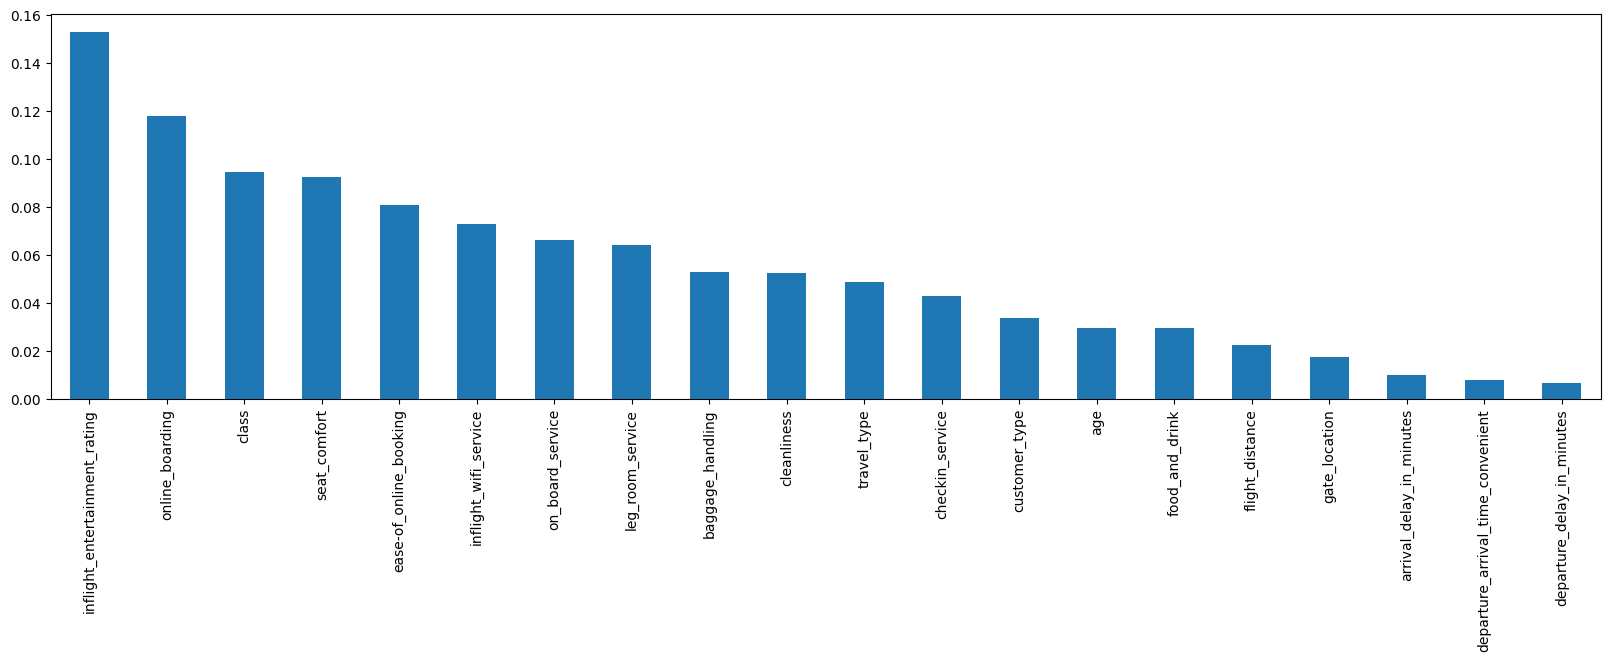

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [ ]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=20)
Select_features.fit(X_train_backup, y_train_backup)
train_index[Select_features.get_support()]

Index(['age', 'arrival_delay_in_minutes', 'baggage_handling',
       'checkin_service', 'class', 'cleanliness', 'customer_type',
       'departure_delay_in_minutes', 'departure_arrival_time_convenient',
       'ease-of_online_booking', 'flight_distance', 'food_and_drink',
       'gate_location', 'inflight_entertainment_rating',
       'inflight_wifi_service', 'leg_room_service', 'on_board_service',
       'online_boarding', 'seat_comfort', 'travel_type'],
      dtype='object')

In [ ]:
#Chúng ta sẽ lấy top10 cột có tính phân loại cao nhất
featuring_columns=['inflight_entertainment_rating', 'online_boarding', 'class',
       'seat_comfort', 'ease-of_online_booking', 'inflight_wifi_service', 'on_board_service',
       'leg_room_service', 'baggage_handling', 'cleanliness']

#'travel_type', 'checkin_service', 'customer_type', 'age', 'food_and_drink'

#We will continue our model with top 15 features, because dataset is big enough

X_train_featuring = X_train_backup[featuring_columns]
X_test_featuring = X_test_backup[featuring_columns]

# **Tiếp tục xây dựng và cải tiến mô hình**

## **LG 2.0**

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
logreg = LogisticRegression()
start_time = time.time()
logreg.fit(X_train_featuring, y_train_backup)
training_time = time.time() - start_time

In [ ]:
y_pred_train = logreg.predict(X_train_featuring)
start_time = time.time()
y_pred_test = logreg.predict(X_test_featuring)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train_backup, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test_backup, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test_backup, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test_backup, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test_backup, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  0.7968518411580143
Accuracy score of the test data is  0.7984678164459501
Precision score of the test data is  0.794682364096081
Recore score of the test data is  0.792303450449031
F1-score score of the test data is  0.7934911242603551
Training time: 2.2369816303253174 seconds
Prediction time: 0.005321979522705078 seconds


## **KNN 2.0**

In [ ]:
#n = 1
knn = KNeighborsClassifier(n_neighbors=1)
start_time = time.time()
knn.fit(X_train_featuring, y_train_backup)
training_time = time.time() - start_time

In [ ]:
y_pred_train = knn.predict(X_train_featuring)
start_time = time.time()
y_pred_test = knn.predict(X_test_featuring)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train_backup, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test_backup, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test_backup, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test_backup, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test_backup, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  0.9435670150718947
Accuracy score of the test data is  0.8945950107791808
Precision score of the test data is  0.8919376427052988
Recore score of the test data is  0.8924294942492517
F1-score score of the test data is  0.8921835006891122
Training time: 0.5055265426635742 seconds
Prediction time: 19.410950183868408 seconds


## **RF 2.0**

In [ ]:
#n = 100
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
start_time = time.time()
rf.fit(X_train_featuring, y_train_backup)
training_time = time.time() - start_time

In [ ]:
y_pred_train = rf.predict(X_train_featuring)
start_time = time.time()
y_pred_test = rf.predict(X_test_featuring)
prediction_time = time.time() - start_time
print("Accuracy score of the train data is ", accuracy_score(y_train_backup, y_pred_train))
print("Accuracy score of the test data is ", accuracy_score(y_test_backup, y_pred_test))
print("Precision score of the test data is ", precision_score(y_test_backup, y_pred_test))
print("Recore score of the test data is ", recall_score(y_test_backup, y_pred_test))
print("F1-score score of the test data is ", f1_score(y_test_backup, y_pred_test))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

Accuracy score of the train data is  0.9575224730996515
Accuracy score of the test data is  0.920561287342162
Precision score of the test data is  0.9282865315660126
Recore score of the test data is  0.9075547502757209
F1-score score of the test data is  0.9178035810312893
Training time: 20.63474202156067 seconds
Prediction time: 1.8266139030456543 seconds


## **ANN 2.0**

In [ ]:
featuring_columns=['inflight_entertainment_rating', 'online_boarding', 'class',
       'seat_comfort', 'ease-of_online_booking', 'inflight_wifi_service', 'on_board_service',
       'leg_room_service', 'baggage_handling', 'cleanliness', 'satisfaction']

In [ ]:
data_backup = data_backup[featuring_columns]

In [ ]:
data_backup

,inflight_entertainment_rating,online_boarding,class,seat_comfort,ease-of_online_booking,inflight_wifi_service,on_board_service,leg_room_service,baggage_handling,cleanliness,satisfaction
0,1,1,Eco,1,1,1,2,4,1,1,dissatisfied
1,2,2,Eco,2,2,2,3,5,1,2,dissatisfied
2,2,4,Eco,2,4,4,2,1,1,2,dissatisfied
3,3,2,Eco,3,2,2,5,3,1,3,dissatisfied
4,3,2,Eco,3,2,2,4,4,1,3,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...
259755,2,4,Business,2,3,4,5,4,4,1,dissatisfied
259756,5,5,Business,1,4,1,2,1,1,1,dissatisfied
259757,1,1,Business,3,3,3,1,3,3,2,dissatisfied
259758,2,2,Eco,2,4,2,1,3,3,2,dissatisfied


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Mã hóa các cột hạng mục
categorical_columns = ['class']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data_backup[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Kết hợp với các cột số nguyên khác
numerical_data = data_backup.drop(columns=categorical_columns + ['satisfaction'])
final_data = pd.concat([numerical_data.reset_index(drop=True), encoded_df], axis=1)

# Mã hóa cột nhãn
label_encoder = OneHotEncoder(sparse=False)
labels = label_encoder.fit_transform(data_backup[['satisfaction']])

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(final_data, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(207806, 11)

In [ ]:
# Define the neural network model (unchanged)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model (unchanged)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using dense arrays
start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=64)
training_time = time.time() - start_time

Epoch 1/10
3247/3247 [==============================] - 12s 3ms/step - loss: 0.2840 - accuracy: 0.8811
Epoch 2/10
3247/3247 [==============================] - 8s 3ms/step - loss: 0.2280 - accuracy: 0.9067
Epoch 3/10
3247/3247 [==============================] - 7s 2ms/step - loss: 0.2116 - accuracy: 0.9127
Epoch 4/10
3247/3247 [==============================] - 8s 2ms/step - loss: 0.2023 - accuracy: 0.9161
Epoch 5/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1964 - accuracy: 0.9188
Epoch 6/10
3247/3247 [==============================] - 8s 2ms/step - loss: 0.1921 - accuracy: 0.9205
Epoch 7/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1887 - accuracy: 0.9214
Epoch 8/10
3247/3247 [==============================] - 8s 2ms/step - loss: 0.1858 - accuracy: 0.9228
Epoch 9/10
3247/3247 [==============================] - 6s 2ms/step - loss: 0.1832 - accuracy: 0.9233
Epoch 10/10
3247/3247 [==============================] - 8s 2ms/step - loss: 0.18

In [ ]:
accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on validation data: {accuracy}')

6494/6494 [==============================] - 9s 1ms/step - loss: 0.1766 - accuracy: 0.9261
Accuracy on validation data: [0.17655375599861145, 0.9261474609375]


In [ ]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Đánh giá chi tiết
from sklearn.metrics import classification_report

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.categories_[0]))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

1624/1624 [==============================] - 2s 1ms/step - loss: 0.1939 - accuracy: 0.9194
Loss: 0.19392572343349457, Accuracy: 0.9194448590278625
1624/1624 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

dissatisfied       0.91      0.93      0.92     26547
   satisfied       0.93      0.91      0.92     25405

    accuracy                           0.92     51952
   macro avg       0.92      0.92      0.92     51952
weighted avg       0.92      0.92      0.92     51952

Training time: 76.7546181678772 seconds
Prediction time: 2.665998697280884 seconds


## **NODE 2.0**

In [ ]:
model = NODE(n_layers=3,
	     n_trees=15,
	     tree_depth=6,
	     units=2,
	     link=tf.keras.activations.softmax)

In [ ]:
# Cấu hình và huấn luyện mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=256)
training_time = time.time() - start_time

Epoch 1/10
812/812 [==============================] - 145s 174ms/step - loss: 0.5813 - accuracy: 0.7837
Epoch 2/10
812/812 [==============================] - 143s 177ms/step - loss: 0.4438 - accuracy: 0.8253
Epoch 3/10
812/812 [==============================] - 142s 175ms/step - loss: 0.3962 - accuracy: 0.8377
Epoch 4/10
812/812 [==============================] - 143s 176ms/step - loss: 0.3701 - accuracy: 0.8473
Epoch 5/10
812/812 [==============================] - 142s 175ms/step - loss: 0.3481 - accuracy: 0.8569
Epoch 6/10
812/812 [==============================] - 141s 174ms/step - loss: 0.3306 - accuracy: 0.8640
Epoch 7/10
812/812 [==============================] - 144s 177ms/step - loss: 0.3173 - accuracy: 0.8698
Epoch 8/10
812/812 [==============================] - 142s 174ms/step - loss: 0.3071 - accuracy: 0.8742
Epoch 9/10
812/812 [==============================] - 145s 178ms/step - loss: 0.2986 - accuracy: 0.8777
Epoch 10/10
812/812 [==============================] - 145s 178m

In [ ]:
accuracy = model.evaluate(X_train, y_train)
print(f'Accuracy on validation data: {accuracy}')

6494/6494 [==============================] - 35s 5ms/step - loss: 0.2840 - accuracy: 0.8844
Accuracy on validation data: [0.2839527428150177, 0.8844210505485535]


In [ ]:
# Đánh giá mô hình
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Đánh giá chi tiết
from sklearn.metrics import classification_report

start_time = time.time()
y_pred = model.predict(X_test)
prediction_time = time.time() - start_time
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.categories_[0]))
print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")

1624/1624 [==============================] - 9s 5ms/step - loss: 0.2882 - accuracy: 0.8830
Loss: 0.2881595194339752, Accuracy: 0.8830459117889404
1624/1624 [==============================] - 7s 4ms/step
              precision    recall  f1-score   support

dissatisfied       0.87      0.91      0.89     26547
   satisfied       0.90      0.86      0.88     25405

    accuracy                           0.88     51952
   macro avg       0.88      0.88      0.88     51952
weighted avg       0.88      0.88      0.88     51952

Training time: 1465.5029327869415 seconds
Prediction time: 10.636550664901733 seconds
